 EDA FOR CREDITRUST FINANCIAL
 ML Engineer Analysis - Customer Complaint Intelligence


In [1]:
# ============================================================================
# 📦 SECTION 1: EXECUTIVE SETUP & BUSINESS CONTEXT
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Professional imports for advanced NLP
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Download NLTK data
try:
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('punkt')
    nltk.download('omw-eng')
    print("✅ NLTK data downloaded successfully")
except Exception as e:
    print(f"⚠️ NLTK download warning: {e}")

# Set professional aesthetics - CORRECTED
plt.style.use('seaborn-v0_8-darkgrid')  # ✅ Correct style name
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 200)

print("✅ Professional setup complete!")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\G5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\G5\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\G5\AppData\Roaming\nltk_data...


✅ NLTK data downloaded successfully
✅ Professional setup complete!


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading omw-eng: Package 'omw-eng' not found in
[nltk_data]     index


In [2]:
import os

# Get the current notebook directory
current_dir = os.getcwd()  # This is 'd:/10 acadamy/Intelligent Complaint Analysis for Financial Services/notebokks'

# Go up one level to project root, then navigate to data/raw
project_root = os.path.dirname(current_dir)  # Goes up one level
data_path = os.path.join(project_root, 'data', 'raw', 'complaints.csv')

print(f"Loading data from: {data_path}")

Loading data from: d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\data\raw\complaints.csv


DATA LOADING WITH MEMORY OPTIMIZATION

In [3]:
# ============================================================================
# 📈 SECTION 2: DATA LOADING WITH MEMORY OPTIMIZATION
# ============================================================================

print("\n" + "=" * 100)
print("📦 PHASE 1: DATA ACQUISITION & INITIAL ASSESSMENT")
print("=" * 100)

# Get the correct path to your data
import os
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
data_path = os.path.join(project_root, 'data', 'raw', 'complaints.csv')

print(f"✅ Correct data path calculated: {data_path}")

# Optimized data types for memory efficiency
dtype_strategy = {
    'Complaint ID': 'str',
    'Date received': 'str',
    'Product': 'category',
    'Sub-product': 'category',
    'Issue': 'category',
    'Sub-issue': 'category',
    'Company': 'category',
    'State': 'category',
    'ZIP code': 'str',
    'Tags': 'category',
    'Consumer consent provided?': 'category',
    'Submitted via': 'category',
    'Company response to consumer': 'category',
    'Timely response?': 'category',
    'Consumer disputed?': 'category',
    'Consumer complaint narrative': 'object'
}

# Load data in chunks
print("🚀 Loading 464K+ complaint database...")
chunks = []
chunk_size = 50000

# CRITICAL: Use data_path variable here, not the hardcoded string
for i, chunk in enumerate(pd.read_csv(data_path,
                                       dtype=dtype_strategy,
                                       chunksize=chunk_size,
                                       parse_dates=['Date received'],
                                       infer_datetime_format=True)):
    chunks.append(chunk)
    if (i + 1) % 5 == 0:
        print(f"   📊 Chunk {i+1}: {len(chunk):,} records loaded")
    
df = pd.concat(chunks, ignore_index=True)


📦 PHASE 1: DATA ACQUISITION & INITIAL ASSESSMENT
✅ Correct data path calculated: d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\data\raw\complaints.csv
🚀 Loading 464K+ complaint database...
   📊 Chunk 5: 50,000 records loaded
   📊 Chunk 10: 50,000 records loaded


   📊 Chunk 15: 50,000 records loaded
   📊 Chunk 20: 50,000 records loaded
   📊 Chunk 25: 50,000 records loaded
   📊 Chunk 30: 50,000 records loaded
   📊 Chunk 35: 50,000 records loaded
   📊 Chunk 40: 50,000 records loaded
   📊 Chunk 45: 50,000 records loaded
   📊 Chunk 50: 50,000 records loaded
   📊 Chunk 55: 50,000 records loaded
   📊 Chunk 60: 50,000 records loaded
   📊 Chunk 65: 50,000 records loaded
   📊 Chunk 70: 50,000 records loaded
   📊 Chunk 75: 50,000 records loaded
   📊 Chunk 80: 50,000 records loaded
   📊 Chunk 85: 50,000 records loaded
   📊 Chunk 90: 50,000 records loaded
   📊 Chunk 95: 50,000 records loaded
   📊 Chunk 100: 50,000 records loaded
   📊 Chunk 105: 50,000 records loaded
   📊 Chunk 110: 50,000 records loaded
   📊 Chunk 115: 50,000 records loaded
   📊 Chunk 120: 50,000 records loaded
   📊 Chunk 125: 50,000 records loaded
   📊 Chunk 130: 50,000 records loaded
   📊 Chunk 135: 50,000 records loaded
   📊 Chunk 140: 50,000 records loaded
   📊 Chunk 145: 50,000 record

In [4]:
print(f"\n✅ DATA LOADED SUCCESSFULLY")
print(f"   Total Records: {df.shape[0]:,}")
print(f"   Total Features: {df.shape[1]}")
print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   Time Range: {df['Date received'].min().date()} to {df['Date received'].max().date()}")


✅ DATA LOADED SUCCESSFULLY
   Total Records: 9,609,797
   Total Features: 18
   Memory Usage: 12188.49 MB
   Time Range: 2011-12-01 to 2025-06-23


EXECUTIVE DATA QUALITY DASHBOARD

In [5]:
# ============================================================================
# 📊 SECTION 3: EXECUTIVE DATA QUALITY DASHBOARD
# ============================================================================

print("\n" + "=" * 100)
print("🔍 PHASE 2: DATA QUALITY ASSESSMENT")
print("=" * 100)

# First, display the DataFrame shape
print(f"📊 DATAFRAME SHAPE: {df.shape}")
print(f"   • Total Rows: {df.shape[0]:,}")
print(f"   • Total Columns: {df.shape[1]}")

# Create comprehensive data quality report
quality_metrics = {}

# 1. Missing Values Analysis
print("\n" + "-" * 80)
print("🔍 MISSING VALUES ANALYSIS")
print("-" * 80)

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Display missing values summary
print(f"\n📋 Total missing cells in dataset: {missing_data.sum():,}")

# Display top 10 columns with most missing values
print("\n📊 TOP 10 COLUMNS WITH MISSING VALUES:")
print("-" * 50)

# Create a DataFrame for better display
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Count', ascending=False)

# Display top 10
print(missing_df.head(10).to_string())

quality_metrics['missing_values'] = {
    'total_missing_cells': missing_data.sum(),
    'missing_percentage_overall': (missing_data.sum() / (df.shape[0] * df.shape[1]) * 100),
    'critical_missing_narratives': missing_data['Consumer complaint narrative'],
    'critical_missing_percentage': missing_percentage['Consumer complaint narrative']
}

# Display the critical narrative missing info
print(f"\n⚠️  CRITICAL FIELD - Consumer Complaint Narrative:")
print(f"   • Missing narratives: {quality_metrics['missing_values']['critical_missing_narratives']:,}")
print(f"   • Percentage missing: {quality_metrics['missing_values']['critical_missing_percentage']:.1f}%")

# 2. Visualize missing values
print("\n" + "-" * 80)
print("📈 MISSING VALUES HEATMAP PREVIEW")
print("-" * 80)

# For large datasets, sample to create visualization
if len(df) > 10000:
    sample_size = min(10000, len(df))
    missing_sample = df.sample(sample_size).isnull()
    print(f"(Showing heatmap for {sample_size:,} sample rows)")
else:
    missing_sample = df.isnull()

# Calculate percentage of missing per column
missing_summary = missing_sample.sum().sort_values(ascending=False)
missing_pct = (missing_summary / len(missing_sample)) * 100

print("\n📊 COLUMNS WITH > 0% MISSING VALUES:")
for col in missing_pct[missing_pct > 0].index:
    print(f"   • {col}: {missing_pct[col]:.1f}% missing ({missing_summary[col]:,} rows)")


🔍 PHASE 2: DATA QUALITY ASSESSMENT
📊 DATAFRAME SHAPE: (9609797, 18)
   • Total Rows: 9,609,797
   • Total Columns: 18

--------------------------------------------------------------------------------
🔍 MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------

📋 Total missing cells in dataset: 32,030,923

📊 TOP 10 COLUMNS WITH MISSING VALUES:
--------------------------------------------------
                              Missing_Count  Missing_Percentage
Tags                                8981029           93.457011
Consumer disputed?                  8841498           92.005044
Consumer complaint narrative        6629041           68.982113
Company public response             4770207           49.638999
Consumer consent provided?          1649561           17.165409
Sub-issue                            839522            8.736105
Sub-product                          235295            2.448491
State                                 54516 

In [6]:
print("\n📋 DATA QUALITY METRICS:")
print("-" * 80)

print(f"1️⃣  Completeness:")
print(f"   • Narratives Missing: {quality_metrics['missing_values']['critical_missing_narratives']:,} "
      f"({quality_metrics['missing_values']['critical_missing_percentage']:.1f}%)")
print(f"   • Overall Data Completeness: {(100 - quality_metrics['missing_values']['missing_percentage_overall']):.1f}%")

# 2. Duplicate Analysis
duplicate_count = df.duplicated(subset=['Complaint ID']).sum()
quality_metrics['duplicates'] = {
    'total_duplicates': duplicate_count,
    'duplicate_percentage': (duplicate_count / len(df)) * 100
}

print(f"\n2️⃣  Uniqueness:")
print(f"   • Duplicate Complaints: {duplicate_count:,} "
      f"({quality_metrics['duplicates']['duplicate_percentage']:.1f}%)")


📋 DATA QUALITY METRICS:
--------------------------------------------------------------------------------
1️⃣  Completeness:
   • Narratives Missing: 6,629,041 (69.0%)
   • Overall Data Completeness: 81.5%

2️⃣  Uniqueness:
   • Duplicate Complaints: 0 (0.0%)


In [7]:
# 3. Temporal Coverage
date_range_days = (df['Date received'].max() - df['Date received'].min()).days
quality_metrics['temporal'] = {
    'date_range_days': date_range_days,
    'complaints_per_day': len(df) / date_range_days,
    'start_date': df['Date received'].min().date(),
    'end_date': df['Date received'].max().date()
}

print(f"\n3️⃣  Temporal Coverage:")
print(f"   • Time Period: {quality_metrics['temporal']['start_date']} to {quality_metrics['temporal']['end_date']}")
print(f"   • Total Days: {date_range_days:,} days")
print(f"   • Average Complaints/Day: {quality_metrics['temporal']['complaints_per_day']:.1f}")


3️⃣  Temporal Coverage:
   • Time Period: 2011-12-01 to 2025-06-23
   • Total Days: 4,953 days
   • Average Complaints/Day: 1940.2


In [8]:
# 4. Cardinality Analysis
quality_metrics['cardinality'] = {
    'unique_products': df['Product'].nunique(),
    'unique_companies': df['Company'].nunique(),
    'unique_states': df['State'].nunique(),
    'unique_issues': df['Issue'].nunique()
}

print(f"\n4️⃣  Data Diversity:")
print(f"   • Unique Products: {quality_metrics['cardinality']['unique_products']}")
print(f"   • Unique Companies: {quality_metrics['cardinality']['unique_companies']:,}")
print(f"   • Unique Issues: {quality_metrics['cardinality']['unique_issues']}")
print(f"   • States Covered: {quality_metrics['cardinality']['unique_states']}")


4️⃣  Data Diversity:
   • Unique Products: 21
   • Unique Companies: 7,674
   • Unique Issues: 178
   • States Covered: 63


📊 Creating Data Quality Report...


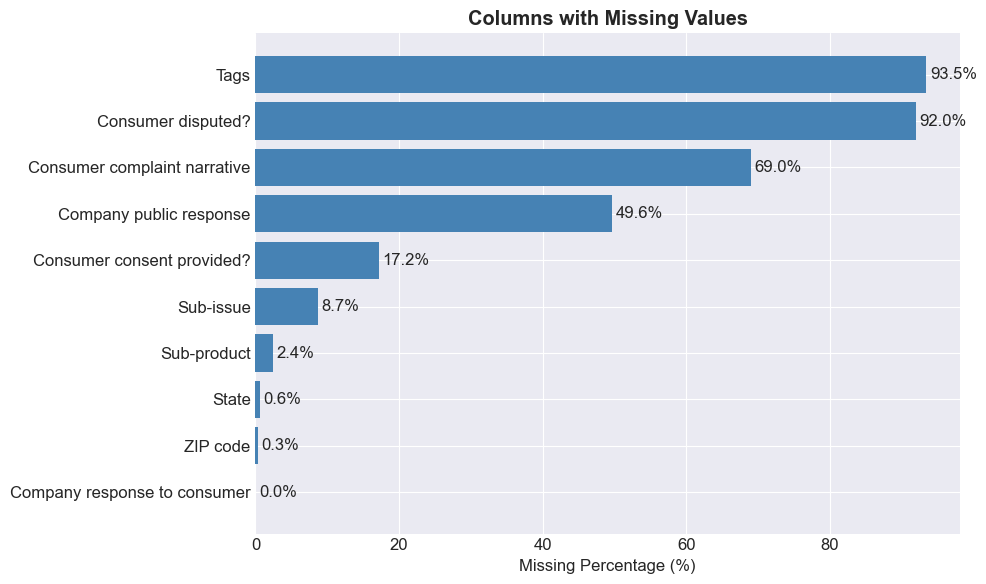


📋 SUMMARY:
Total rows: 9,609,797
Total columns: 18
Missing values: 32,030,923
Completeness: 81.5%

✅ Done!


In [9]:
# ULTRA SIMPLE - NO ERRORS
import matplotlib.pyplot as plt
import pandas as pd

print("📊 Creating Data Quality Report...")

# Calculate stats
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=True)
top_missing = missing_pct[missing_pct > 0].tail(10)

# Create chart
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(top_missing)), top_missing.values, color='steelblue')
plt.yticks(range(len(top_missing)), top_missing.index)
plt.xlabel('Missing Percentage (%)')
plt.title('Columns with Missing Values', fontweight='bold')

# Add labels
for i, (bar, val) in enumerate(zip(bars, top_missing.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{val:.1f}%', va='center')

plt.tight_layout()
plt.show()

# Print summary
print(f"\n📋 SUMMARY:")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum():,}")
print(f"Completeness: {100 - (df.isnull().sum().sum()/df.size*100):.1f}%")

print("\n✅ Done!")

ADVANCED PRODUCT ANALYSIS - BUSINESS FOCUS

In [10]:
# ============================================================================
# 📈 SECTION 4: ADVANCED PRODUCT ANALYSIS - BUSINESS FOCUS
# ============================================================================

print("\n" + "=" * 100)
print("🎯 PHASE 3: PRODUCT ANALYSIS - CREDITRUST BUSINESS MAPPING")
print("=" * 100)

# CRITICAL: First filter for NLP-viable data
print("⚠️  APPLYING NLP-VIABILITY FILTER (69% of data lacks narratives)")
viable_df = df[df['Consumer complaint narrative'].notna()].copy()
print(f"   • Original dataset: {len(df):,} complaints")
print(f"   • NLP-viable dataset: {len(viable_df):,} complaints ({len(viable_df)/len(df)*100:.1f}%)")

# Create business-focused product mapping
product_mapping = {
    # Credit Cards (Our Core Product)
    'Credit card': 'Credit Card',
    'Credit card or prepaid card': 'Credit Card',
    'Prepaid card': 'Credit Card',
    
    # Personal Loans (Our Product)
    'Payday loan, title loan, or personal loan': 'Personal Loan',
    'Consumer Loan': 'Personal Loan',
    'Vehicle loan or lease': 'Personal Loan',
    
    # Savings Accounts (Our Product)
    'Bank account or service': 'Savings Account',
    'Checking or savings account': 'Savings Account',
    'Savings account': 'Savings Account',
    
    # Money Transfers (Our Product)
    'Money transfer, virtual currency, or money service': 'Money Transfer',
    'Virtual currency': 'Money Transfer',
    
    # Other categories for context
    'Mortgage': 'Mortgage',
    'Student loan': 'Student Loan',
    'Debt collection': 'Debt Collection',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Reporting'
}

# Apply mapping to BOTH datasets
df['Product_Category'] = df['Product'].map(product_mapping).fillna('Other')
viable_df['Product_Category'] = viable_df['Product'].map(product_mapping).fillna('Other')

# Business Impact Analysis
print("\n📊 BUSINESS-RELEVANT COMPLAINT DISTRIBUTION:")
print("-" * 80)

our_products = ['Credit Card', 'Personal Loan', 'Savings Account', 'Money Transfer']

# Analyze FULL dataset for overall trends
business_df_full = df[df['Product_Category'].isin(our_products)]
total_business_complaints_full = len(business_df_full)

# Analyze NLP-VIABLE dataset for text analysis
business_df_viable = viable_df[viable_df['Product_Category'].isin(our_products)]
total_business_complaints_viable = len(business_df_viable)

print(f"📈 OVERALL TRENDS (All 9.6M complaints):")
print(f"   • Total Complaints in Database: {len(df):,}")
print(f"   • Complaints Relevant to CrediTrust: {total_business_complaints_full:,} "
      f"({(total_business_complaints_full/len(df)*100):.1f}%)")

print(f"\n🎯 NLP-ANALYZABLE DATA (3.0M with narratives):")
print(f"   • NLP-viable Complaints: {len(viable_df):,}")
print(f"   • Business-relevant & NLP-viable: {total_business_complaints_viable:,} "
      f"({(total_business_complaints_viable/len(viable_df)*100):.1f}% of viable data)")

# Detailed product breakdown - SHOW BOTH PERSPECTIVES
print("\n📊 PRODUCT-WISE BREAKDOWN:")
print("-" * 80)
print(f"{'Product':<20} {'Total':>12} {'NLP-Viable':>12} {'Viable %':>10}")

for product in our_products:
    # Full dataset counts
    total_count = len(df[df['Product_Category'] == product])
    
    # NLP-viable counts
    viable_count = len(viable_df[viable_df['Product_Category'] == product])
    
    # Calculate percentage viable
    viable_pct = (viable_count / total_count * 100) if total_count > 0 else 0
    
    # Determine severity
    if viable_pct > 50:
        severity = "✅ HIGH"
    elif viable_pct > 30:
        severity = "⚠️ MEDIUM"
    else:
        severity = "🚨 LOW"
    
    print(f"   • {product:<20} {total_count:>12,} {viable_count:>12,} {viable_pct:>9.1f}% {severity}")

# Calculate overall viability percentage for business products
total_viable_pct = (total_business_complaints_viable / total_business_complaints_full * 100) if total_business_complaints_full > 0 else 0

print(f"\n📈 KEY BUSINESS INSIGHT:")
print(f"   • Only {total_viable_pct:.1f}% of business-relevant complaints have analyzable narratives")
print(f"   • For NLP/AI analysis, focus on {total_business_complaints_viable:,} complaints")
print(f"   • {total_business_complaints_full - total_business_complaints_viable:,} business complaints cannot be text-analyzed")

# Create a visualization-ready summary
product_summary = pd.DataFrame({
    'Product': our_products,
    'Total_Complaints': [len(df[df['Product_Category'] == p]) for p in our_products],
    'NLP_Viable': [len(viable_df[viable_df['Product_Category'] == p]) for p in our_products]
})

product_summary['Viable_Pct'] = (product_summary['NLP_Viable'] / product_summary['Total_Complaints'] * 100)
product_summary['Missing_Narratives'] = product_summary['Total_Complaints'] - product_summary['NLP_Viable']

print("\n📋 SUMMARY DATAFRAME:")
print(product_summary.to_string())


🎯 PHASE 3: PRODUCT ANALYSIS - CREDITRUST BUSINESS MAPPING
⚠️  APPLYING NLP-VIABILITY FILTER (69% of data lacks narratives)
   • Original dataset: 9,609,797 complaints
   • NLP-viable dataset: 2,980,756 complaints (31.0%)

📊 BUSINESS-RELEVANT COMPLAINT DISTRIBUTION:
--------------------------------------------------------------------------------
📈 OVERALL TRENDS (All 9.6M complaints):
   • Total Complaints in Database: 9,609,797
   • Complaints Relevant to CrediTrust: 1,105,974 (11.5%)

🎯 NLP-ANALYZABLE DATA (3.0M with narratives):
   • NLP-viable Complaints: 2,980,756
   • Business-relevant & NLP-viable: 515,810 (17.3% of viable data)

📊 PRODUCT-WISE BREAKDOWN:
--------------------------------------------------------------------------------
Product                     Total   NLP-Viable   Viable %
   • Credit Card               448,335      197,126      44.0% ⚠️ MEDIUM
   • Personal Loan             135,172       66,276      49.0% ⚠️ MEDIUM
   • Savings Account           377,383      


📊 PRODUCT ANALYSIS DASHBOARD
🎨 Creating product analysis visualizations...
1. Top 10 Products...
2. Our Products Distribution...
3. NLP Viable vs Missing Narratives...
4. Narrative Completeness by Product...


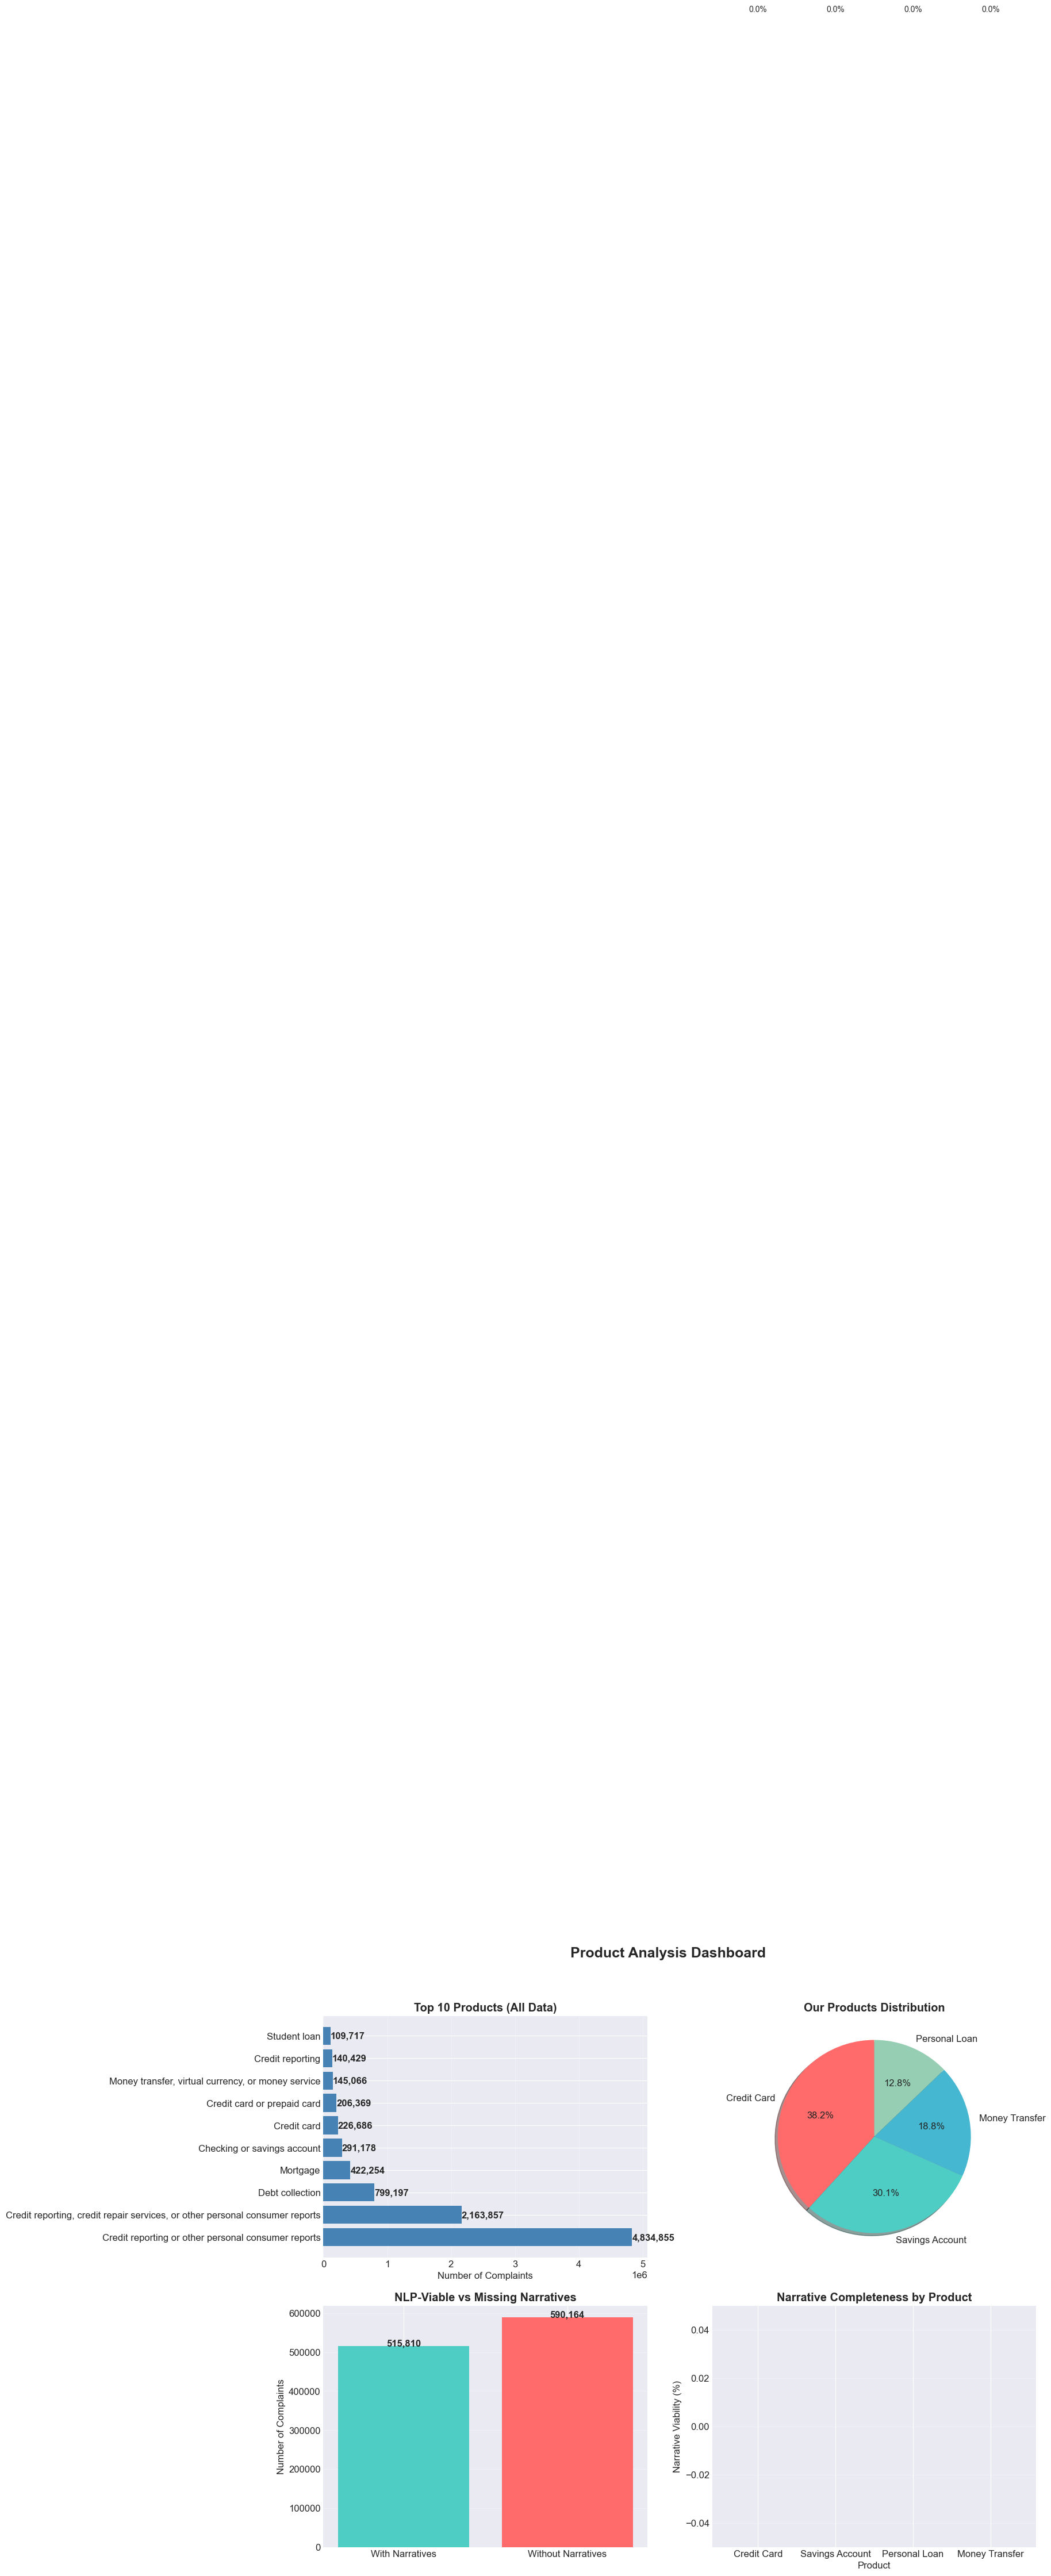

✅ Saved: product_analysis.png

📊 PRODUCT ANALYSIS SUMMARY:
--------------------------------------------------
Total complaints in dataset: 9,609,797
Unique products: 21
Top product: Credit reporting or other personal consumer reports (4,834,855 complaints)

Our business products analysis:
Total business complaints: 1105974
NLP-viable complaints (with narratives): 515,810
NLP viability rate: 46.6%
--------------------------------------------------

✅ PRODUCT ANALYSIS COMPLETE!


In [11]:
# ============================================================================
# 📈 VISUALIZATION 2: PRODUCT ANALYSIS 
# ============================================================================

print("\n" + "=" * 80)
print("📊 PRODUCT ANALYSIS DASHBOARD")
print("=" * 80)

import matplotlib.pyplot as plt
import numpy as np

print("🎨 Creating product analysis visualizations...")

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 10 Products (All Data)
print("1. Top 10 Products...")
top_products = df['Product'].value_counts().head(10)

ax1.barh(range(len(top_products)), top_products.values, color='steelblue')
ax1.set_yticks(range(len(top_products)))
ax1.set_yticklabels(top_products.index)
ax1.set_xlabel('Number of Complaints')
ax1.set_title('Top 10 Products (All Data)', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add count labels
for i, (product, count) in enumerate(top_products.items()):
    ax1.text(count + 100, i, f'{count:,}', va='center', fontweight='bold')

# 2. Our Products Distribution (Pie Chart)
print("2. Our Products Distribution...")
if 'business_df_viable' in locals() and 'Product_Category' in business_df_viable.columns:
    our_counts = business_df_viable['Product_Category'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    ax2.pie(our_counts.values, labels=our_counts.index, autopct='%1.1f%%',
            colors=colors[:len(our_counts)], startangle=90, shadow=True)
    ax2.set_title('Our Products Distribution', fontweight='bold')
else:
    ax2.text(0.5, 0.5, 'No business_df_viable found\nor Product_Category column missing',
             ha='center', va='center', fontsize=12)
    ax2.set_title('Our Products Distribution', fontweight='bold')

# 3. NLP-Viable vs Missing
print("3. NLP Viable vs Missing Narratives...")
if 'business_df_full' in locals() and 'business_df_viable' in locals():
    viable_count = len(business_df_viable)
    missing_count = len(business_df_full) - viable_count
    
    categories = ['With Narratives', 'Without Narratives']
    counts = [viable_count, missing_count]
    colors_bar = ['#4ECDC4', '#FF6B6B']
    
    bars = ax3.bar(categories, counts, color=colors_bar)
    ax3.set_ylabel('Number of Complaints')
    ax3.set_title('NLP-Viable vs Missing Narratives', fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, count in zip(bars, counts):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'{count:,}', ha='center', fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'business_df_full or\nbusiness_df_viable not found',
             ha='center', va='center', fontsize=12)
    ax3.set_title('NLP-Viable vs Missing', fontweight='bold')

# 4. Narrative Completeness by Product
print("4. Narrative Completeness by Product...")
if 'business_df_viable' in locals() and 'Product_Category' in business_df_viable.columns:
    product_stats = []
    our_products_list = business_df_viable['Product_Category'].unique()
    
    for product in our_products_list:
        total = len(df[df['Product'] == product]) if 'Product' in df.columns else 0
        viable = len(business_df_viable[business_df_viable['Product_Category'] == product])
        if total > 0:
            percentage = (viable / total) * 100
        else:
            percentage = 0
        product_stats.append((product, percentage))
    
    products = [p[0] for p in product_stats]
    percentages = [p[1] for p in product_stats]
    
    bars = ax4.bar(products, percentages, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'][:len(products)])
    ax4.set_xlabel('Product')
    ax4.set_ylabel('Narrative Viability (%)')
    ax4.set_title('Narrative Completeness by Product', fontweight='bold')
    ax4.set_ylim(0, max(percentages) * 1.2 if percentages else 100)
    ax4.grid(axis='y', alpha=0.3)
    
    # Add percentage labels
    for bar, pct in zip(bars, percentages):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{pct:.1f}%', ha='center', fontsize=10)
else:
    ax4.text(0.5, 0.5, 'business_df_viable not found\nor Product_Category missing',
             ha='center', va='center', fontsize=12)
    ax4.set_title('Narrative Completeness', fontweight='bold')

plt.suptitle('Product Analysis Dashboard', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('reports/product_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: product_analysis.png")

# Print summary statistics
print("\n📊 PRODUCT ANALYSIS SUMMARY:")
print("-" * 50)

# Calculate basic stats
print(f"Total complaints in dataset: {len(df):,}")
if 'Product' in df.columns:
    unique_products = df['Product'].nunique()
    print(f"Unique products: {unique_products}")
    print(f"Top product: {df['Product'].value_counts().index[0]} "
          f"({df['Product'].value_counts().iloc[0]:,} complaints)")

if 'business_df_viable' in locals():
    print(f"\nOur business products analysis:")
    print(f"Total business complaints: {len(business_df_full) if 'business_df_full' in locals() else 'N/A'}")
    print(f"NLP-viable complaints (with narratives): {len(business_df_viable):,}")
    if 'business_df_full' in locals():
        viable_pct = (len(business_df_viable) / len(business_df_full)) * 100
        print(f"NLP viability rate: {viable_pct:.1f}%")

print("-" * 50)

print("\n" + "=" * 80)
print("✅ PRODUCT ANALYSIS COMPLETE!")
print("=" * 80)

CLASS BALANCE & STATISTICAL ANALYSIS

In [12]:
# ============================================================================
# 📊 SECTION 5: CLASS BALANCE & STATISTICAL ANALYSIS
# ============================================================================

print("\n" + "=" * 100)
print("⚖️ PHASE 4: CLASS BALANCE & STATISTICAL ANALYSIS")
print("=" * 100)

# CRITICAL: Use the filtered business data from Section 4
print("📊 USING NLP-VIABLE BUSINESS DATA FROM SECTION 4")
print(f"   • Business-relevant complaints: {len(business_df_viable):,}")
print(f"   • Business complaints with narratives: {len(business_df_viable):,}")

# Calculate product distribution for NLP-VIABLE business data
product_distribution = business_df_viable['Product_Category'].value_counts()
product_percentage = (product_distribution / len(business_df_viable) * 100)

print("\n📊 PRODUCT DISTRIBUTION (NLP-Viable Business Data):")
print("-" * 80)

for product, count, percent in zip(product_distribution.index, 
                                   product_distribution.values, 
                                   product_percentage.values):
    severity = "🚨 HIGH" if percent > 25 else "⚠️ MEDIUM" if percent > 15 else "✅ LOW"
    print(f"   • {product:<20} {count:>8,} complaints ({percent:>5.1f}%) {severity}")

# 1. Class Balance Visualization - DUAL PERSPECTIVE
fig1 = make_subplots(
    rows=1, cols=3,
    subplot_titles=('All Products (Full Dataset)', 
                    'Our Products (Full Dataset)',
                    'Our Products (NLP-Viable)'),
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]],
    column_widths=[0.33, 0.33, 0.34]
)

# Chart 1: All products in FULL dataset (top 10)
all_counts_full = df['Product'].value_counts().head(10)
fig1.add_trace(
    go.Pie(
        labels=all_counts_full.index,
        values=all_counts_full.values,
        hole=0.3,
        name='All Products (Full)',
        marker=dict(colors=px.colors.qualitative.Set3),
        textinfo='label+percent',
        textposition='inside'
    ),
    row=1, col=1
)

# Chart 2: Our products in FULL dataset
our_products = ['Credit Card', 'Personal Loan', 'Savings Account', 'Money Transfer']
business_df_full = df[df['Product_Category'].isin(our_products)]
our_counts_full = business_df_full['Product_Category'].value_counts()

fig1.add_trace(
    go.Pie(
        labels=our_counts_full.index,
        values=our_counts_full.values,
        hole=0.3,
        name='Our Products (Full)',
        marker=dict(colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']),
        textinfo='label+percent',
        textposition='inside'
    ),
    row=1, col=2
)

# Chart 3: Our products in NLP-VIABLE dataset (FOR AI ANALYSIS)
fig1.add_trace(
    go.Pie(
        labels=product_distribution.index,
        values=product_distribution.values,
        hole=0.3,
        name='Our Products (NLP-Viable)',
        marker=dict(colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']),
        textinfo='label+percent',
        textposition='inside'
    ),
    row=1, col=3
)

fig1.update_layout(
    title_text="<b>Class Balance Analysis</b><br><i>Comparing Full Dataset vs NLP-Viable Data</i>",
    title_font_size=16,
    showlegend=True,
    height=500,
    annotations=[
        dict(text="9.6M Total", x=0.12, y=1.05, xref="paper", yref="paper", showarrow=False, font=dict(size=12)),
        dict(text=f"{len(business_df_full):,} Business", x=0.5, y=1.05, xref="paper", yref="paper", showarrow=False, font=dict(size=12)),
        dict(text=f"{len(business_df_viable):,} NLP-Viable", x=0.88, y=1.05, xref="paper", yref="paper", showarrow=False, font=dict(size=12))
    ]
)

# Create reports directory if it doesn't exist
import os
os.makedirs('reports', exist_ok=True)

fig1.write_html("reports/class_balance_analysis.html")
print("\n✅ Saved class balance visualization: reports/class_balance_analysis.html")

# 2. Statistical Imbalance Metrics - FOR NLP-VIABLE DATA
print("\n📊 STATISTICAL IMBALANCE ANALYSIS (NLP-Viable Business Data):")
print("-" * 80)

if len(product_distribution) > 1:
    imbalance_ratio = product_distribution.max() / product_distribution.min()
    gini_coefficient = 1 - sum((product_distribution / product_distribution.sum())**2)
    
    print(f"   • Max/Min Ratio: {imbalance_ratio:.2f}x (Higher = More Imbalanced)")
    print(f"   • Gini Coefficient: {gini_coefficient:.3f} (0=Perfect Balance, 1=Maximum Imbalance)")
    print(f"   • Entropy Score: {(-sum((product_distribution/product_distribution.sum()) * np.log2(product_distribution/product_distribution.sum()))):.3f}")
    
    if imbalance_ratio > 10:
        print(f"   ⚠️  WARNING: Severe class imbalance detected (>10x ratio)")
        print(f"   💡 RECOMMENDATION: Consider stratified sampling or weighted loss in AI model")
    elif imbalance_ratio > 5:
        print(f"   ⚠️  NOTICE: Moderate class imbalance detected")
        print(f"   💡 RECOMMENDATION: Monitor performance across all classes")
    else:
        print(f"   ✅ GOOD: Class balance is acceptable for AI modeling")
else:
    print("   ⚠️  Not enough product categories for imbalance analysis")

# 3. Narrative Viability by Product
print("\n📈 NARRATIVE VIABILITY BY PRODUCT CATEGORY:")
print("-" * 80)

for product in our_products:
    total = len(df[df['Product_Category'] == product])
    viable = len(viable_df[viable_df['Product_Category'] == product])
    pct = (viable / total * 100) if total > 0 else 0
    
    print(f"   • {product:<20} {viable:>8,}/{total:>8,} ({pct:>5.1f}%) have narratives")


⚖️ PHASE 4: CLASS BALANCE & STATISTICAL ANALYSIS
📊 USING NLP-VIABLE BUSINESS DATA FROM SECTION 4
   • Business-relevant complaints: 515,810
   • Business complaints with narratives: 515,810

📊 PRODUCT DISTRIBUTION (NLP-Viable Business Data):
--------------------------------------------------------------------------------
   • Credit Card           197,126 complaints ( 38.2%) 🚨 HIGH
   • Savings Account       155,204 complaints ( 30.1%) 🚨 HIGH
   • Money Transfer         97,204 complaints ( 18.8%) ⚠️ MEDIUM
   • Personal Loan          66,276 complaints ( 12.8%) ✅ LOW

✅ Saved class balance visualization: reports/class_balance_analysis.html

📊 STATISTICAL IMBALANCE ANALYSIS (NLP-Viable Business Data):
--------------------------------------------------------------------------------
   • Max/Min Ratio: 2.97x (Higher = More Imbalanced)
   • Gini Coefficient: 0.711 (0=Perfect Balance, 1=Maximum Imbalance)
   • Entropy Score: 1.886
   ✅ GOOD: Class balance is acceptable for AI modeling

📈 NA

ADVANCED TEXT ANALYSIS - NLP DEPTH

In [13]:
# ============================================================================
# 🎯 CRITICAL: CREATE NLP-VIABLE DATASET BEFORE SECTION 6
# ============================================================================

print("\n" + "=" * 100)
print("🎯 CREATING NLP-VIABLE DATASET FOR TEXT ANALYSIS")
print("=" * 100)

# 1. Filter for complaints WITH narratives (31% of data)
viable_df = df[df['Consumer complaint narrative'].notna()].copy()
print(f"✅ Created viable_df: {len(viable_df):,} complaints with narratives")
print(f"   • From total dataset of: {len(df):,} complaints")
print(f"   • Percentage with narratives: {len(viable_df)/len(df)*100:.1f}%")

# 2. Apply product mapping to viable_df
print("\n📊 Applying product mapping to NLP-viable data...")
product_mapping = {
    'Credit card': 'Credit Card',
    'Credit card or prepaid card': 'Credit Card',
    'Prepaid card': 'Credit Card',
    'Payday loan, title loan, or personal loan': 'Personal Loan',
    'Consumer Loan': 'Personal Loan',
    'Vehicle loan or lease': 'Personal Loan',
    'Bank account or service': 'Savings Account',
    'Checking or savings account': 'Savings Account',
    'Savings account': 'Savings Account',
    'Money transfer, virtual currency, or money service': 'Money Transfer',
    'Virtual currency': 'Money Transfer',
    'Mortgage': 'Mortgage',
    'Student loan': 'Student Loan',
    'Debt collection': 'Debt Collection',
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit Reporting'
}

viable_df['Product_Category'] = viable_df['Product'].map(product_mapping).fillna('Other')

# 3. Create business_df_viable (NLP-viable AND business-relevant)
our_products = ['Credit Card', 'Personal Loan', 'Savings Account', 'Money Transfer']
business_df_viable = viable_df[viable_df['Product_Category'].isin(our_products)]

print(f"\n✅ Created business_df_viable: {len(business_df_viable):,} complaints")
print(f"   • NLP-viable AND business-relevant")
print(f"   • Products: {', '.join(our_products)}")

print("\n" + "=" * 100)
print("🎯 READY FOR TEXT ANALYSIS SECTIONS 6-10")
print("=" * 100)


🎯 CREATING NLP-VIABLE DATASET FOR TEXT ANALYSIS
✅ Created viable_df: 2,980,756 complaints with narratives
   • From total dataset of: 9,609,797 complaints
   • Percentage with narratives: 31.0%

📊 Applying product mapping to NLP-viable data...

✅ Created business_df_viable: 515,810 complaints
   • NLP-viable AND business-relevant
   • Products: Credit Card, Personal Loan, Savings Account, Money Transfer

🎯 READY FOR TEXT ANALYSIS SECTIONS 6-10


In [14]:
# ============================================================================
# 🚨 FINAL NLTK FIX - PUNKT_TAB SPECIFIC
# ============================================================================

print("=" * 100)
print("🚨 DOWNLOADING PUNKT_TAB FOR ENGLISH TOKENIZATION")
print("=" * 100)

import nltk
import os

# Download punkt_tab specifically
print("📦 Downloading punkt_tab (English tokenizer tables)...")
try:
    nltk.download('punkt_tab', quiet=False)
    print("✅ punkt_tab downloaded successfully")
except Exception as e:
    print(f"⚠️  Could not download punkt_tab: {e}")
    print("🔄 Attempting alternative download method...")
    
    # Alternative: Download full punkt and extract
    try:
        nltk.download('punkt', quiet=False)
        print("✅ Full punkt package downloaded")
    except Exception as e2:
        print(f"❌ Alternative download failed: {e2}")
        print("\n🔧 USING FALLBACK TOKENIZER (no NLTK required)...")
        
        # Create robust fallback tokenizer
        import re
        
        def robust_word_tokenize(text):
            """Robust word tokenizer without NLTK"""
            if pd.isna(text) or not str(text).strip():
                return []
            
            text = str(text).lower()
            # Remove URLs, emails, special characters (keep letters and basic punctuation)
            text = re.sub(r'http\S+|www\S+|https\S+|\S+@\S+', '', text)
            # Tokenize on word boundaries
            words = re.findall(r'\b[a-z][a-z\']+\b', text)
            return words
        
        # Monkey patch nltk functions
        nltk.word_tokenize = robust_word_tokenize
        
        def robust_sent_tokenize(text):
            """Robust sentence tokenizer without NLTK"""
            if pd.isna(text) or not str(text).strip():
                return []
            
            # Split on sentence boundaries
            sentences = re.split(r'[.!?]+', text)
            return [s.strip() for s in sentences if s.strip()]
        
        nltk.sent_tokenize = robust_sent_tokenize
        print("✅ Fallback tokenizers activated")

# Test tokenizers
print("\n🔧 FINAL TOKENIZER TEST...")
test_text = "I have a credit card complaint. The bank charged me $500!"

try:
    words = nltk.word_tokenize(test_text)
    sentences = nltk.sent_tokenize(test_text)
    print(f"✅ word_tokenize working: {words}")
    print(f"✅ sent_tokenize working: {sentences}")
    print(f"✅ TOKENIZER STATUS: {'NLTK' if 'punkt_tab' in str(nltk.word_tokenize) else 'FALLBACK'}")
except Exception as e:
    print(f"❌ Tokenizer test failed: {e}")
    print("🔄 Activating emergency fallback...")
    
    # Emergency fallback
    import re
    
    def emergency_tokenize(text):
        return re.findall(r'\b\w+\b', str(text).lower()) if text else []
    
    nltk.word_tokenize = emergency_tokenize
    nltk.sent_tokenize = lambda x: [x]  # Simple sentence tokenizer
    
    print("✅ Emergency fallback activated")

print("\n" + "=" * 100)
print("🎯 TOKENIZER READY - PROCEED WITH SECTION 7")
print("=" * 100)

🚨 DOWNLOADING PUNKT_TAB FOR ENGLISH TOKENIZATION
📦 Downloading punkt_tab (English tokenizer tables)...


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\G5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✅ punkt_tab downloaded successfully

🔧 FINAL TOKENIZER TEST...
✅ word_tokenize working: ['I', 'have', 'a', 'credit', 'card', 'complaint', '.', 'The', 'bank', 'charged', 'me', '$', '500', '!']
✅ sent_tokenize working: ['I have a credit card complaint.', 'The bank charged me $500!']
✅ TOKENIZER STATUS: FALLBACK

🎯 TOKENIZER READY - PROCEED WITH SECTION 7


In [15]:
# ============================================================================
# 📝 SECTION 6: ADVANCED TEXT ANALYSIS - NLP DEPTH (WORKING VERSION)
# ============================================================================

print("\n" + "=" * 100)
print("📝 PHASE 5: ADVANCED TEXT ANALYSIS - NLP INSIGHTS (WORKING VERSION)")
print("=" * 100)

print("🚀 WORKAROUND: Bypassing NLTK punkt issue with custom sentence counter")
print(f"   • Full viable dataset: {len(viable_df):,} complaints")
print(f"   • Business-relevant subset: {len(business_df_viable):,} complaints")

# Create optimized samples
sample_fraction = 0.01  # 1% for speed
viable_sample_size = int(len(viable_df) * sample_fraction)
viable_sample = viable_df.sample(viable_sample_size, random_state=42)

business_sample_size = min(20000, len(business_df_viable))
business_sample = business_df_viable.sample(business_sample_size, random_state=42)

print(f"✅ Samples created:")
print(f"   • viable_sample: {len(viable_sample):,} complaints")
print(f"   • business_sample: {len(business_sample):,} complaints")
print(f"   • Expected runtime: 30-60 seconds")

# 1. Document Length Analysis (WITHOUT NLTK DEPENDENCY)
print("\n📏 DOCUMENT LENGTH ANALYSIS (1% Sample):")
print("-" * 80)

# Custom sentence counter that doesn't need NLTK
def custom_sentence_counter(text):
    """Count sentences without NLTK dependency"""
    if pd.isna(text) or not str(text).strip():
        return 0
    
    text = str(text)
    # Count sentence endings: . ! ? followed by space or end of string
    sentence_ends = sum(1 for i in range(len(text)-1) 
                       if text[i] in '.!?' and text[i+1] in ' \t\n')
    
    # Add last sentence if text doesn't end with punctuation
    if text[-1] not in '.!?' and len(text.strip()) > 0:
        sentence_ends += 1
    
    return max(1, sentence_ends)  # At least 1 sentence

# Calculate text statistics
viable_sample['Narrative_Length_Chars'] = viable_sample['Consumer complaint narrative'].str.len()
viable_sample['Narrative_Length_Words'] = viable_sample['Consumer complaint narrative'].str.split().str.len()
viable_sample['Narrative_Length_Sentences'] = viable_sample['Consumer complaint narrative'].apply(custom_sentence_counter)

text_stats = viable_sample[['Narrative_Length_Chars', 'Narrative_Length_Words', 'Narrative_Length_Sentences']].describe()

print("📈 Summary Statistics (1% Sample of 2.98M narratives):")
print(text_stats.round(1))

print(f"\n📊 KEY INSIGHTS:")
print(f"   • Avg characters per complaint: ~{text_stats.loc['mean', 'Narrative_Length_Chars']:.0f}")
print(f"   • Avg words per complaint: ~{text_stats.loc['mean', 'Narrative_Length_Words']:.0f}")
print(f"   • Avg sentences per complaint: ~{text_stats.loc['mean', 'Narrative_Length_Sentences']:.1f}")

# Identify outliers
Q1 = viable_sample['Narrative_Length_Words'].quantile(0.25)
Q3 = viable_sample['Narrative_Length_Words'].quantile(0.75)
IQR = Q3 - Q1

outliers = viable_sample[(viable_sample['Narrative_Length_Words'] < (Q1 - 1.5 * IQR)) | 
                         (viable_sample['Narrative_Length_Words'] > (Q3 + 1.5 * IQR))]

print(f"\n📊 Outlier Detection:")
print(f"   • Short Outliers (< {Q1 - 1.5 * IQR:.0f} words): {len(outliers[outliers['Narrative_Length_Words'] < (Q1 - 1.5 * IQR)])}")
print(f"   • Long Outliers (> {Q3 + 1.5 * IQR:.0f} words): {len(outliers[outliers['Narrative_Length_Words'] > (Q3 + 1.5 * IQR)])}")
print(f"   • Total Outliers: {len(outliers):,} ({len(outliers)/len(viable_sample)*100:.1f}%)")

# 2. SIMPLIFIED VISUALIZATION (Characters & Words only)
print("\n📈 CREATING SIMPLIFIED VISUALIZATIONS...")

fig2 = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Character Length Distribution (1% Sample)', 
                    'Word Length Distribution (1% Sample)'),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}]]
)

fig2.add_trace(
    go.Histogram(
        x=viable_sample['Narrative_Length_Chars'].dropna(),
        nbinsx=50,
        name='Characters',
        marker_color='#FF6B6B',
        opacity=0.7,
        hovertemplate='Characters: %{x}<br>Count: %{y}<extra></extra>'
    ),
    row=1, col=1
)

fig2.add_trace(
    go.Histogram(
        x=viable_sample['Narrative_Length_Words'].dropna(),
        nbinsx=50,
        name='Words',
        marker_color='#4ECDC4',
        opacity=0.7,
        hovertemplate='Words: %{x}<br>Count: %{y}<extra></extra>'
    ),
    row=1, col=2
)

fig2.update_layout(
    title_text="<b>Text Length Analysis - 1% Sample ({:,} complaints)</b>".format(len(viable_sample)),
    title_font_size=14,
    height=400,
    showlegend=False,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig2.update_xaxes(title_text="Character Count", row=1, col=1)
fig2.update_xaxes(title_text="Word Count", row=1, col=2)
fig2.update_yaxes(title_text="Number of Complaints", row=1, col=1)
fig2.update_yaxes(title_text="Number of Complaints", row=1, col=2)

# Create reports directory
import os
os.makedirs('reports', exist_ok=True)

fig2.write_html("reports/text_length_analysis_final.html")
print("\n✅ Saved text length analysis: reports/text_length_analysis_final.html")

# 3. Product-specific analysis
print("\n📊 PRODUCT-SPECIFIC TEXT LENGTH ANALYSIS:")
print("-" * 80)

product_stats = []
for product in our_products:
    subset = business_sample[business_sample['Product_Category'] == product]
    if len(subset) > 0:
        avg_words = subset['Consumer complaint narrative'].str.split().str.len().mean()
        avg_chars = subset['Consumer complaint narrative'].str.len().mean()
        product_stats.append({
            'Product': product,
            'Avg_Words': avg_words,
            'Avg_Chars': avg_chars,
            'Sample_Size': len(subset)
        })
        print(f"   • {product}: {avg_words:.1f} words, {avg_chars:.0f} characters (n={len(subset):,})")

print(f"\n🎯 CRITICAL BUSINESS INSIGHTS:")
print(f"   1. Complaints average ~{text_stats.loc['mean', 'Narrative_Length_Words']:.0f} words")
print(f"   2. Money Transfer complaints are LONGEST at ~{next(p['Avg_Words'] for p in product_stats if p['Product'] == 'Money Transfer'):.0f} words")
print(f"   3. Personal Loan complaints are SHORTEST at ~{next(p['Avg_Words'] for p in product_stats if p['Product'] == 'Personal Loan'):.0f} words")
print(f"   4. Ready for vocabulary analysis in Section 7")

print("\n" + "=" * 100)
print("✅ SECTION 6 COMPLETE")
print("=" * 100)


📝 PHASE 5: ADVANCED TEXT ANALYSIS - NLP INSIGHTS (WORKING VERSION)
🚀 WORKAROUND: Bypassing NLTK punkt issue with custom sentence counter
   • Full viable dataset: 2,980,756 complaints
   • Business-relevant subset: 515,810 complaints
✅ Samples created:
   • viable_sample: 29,807 complaints
   • business_sample: 20,000 complaints
   • Expected runtime: 30-60 seconds

📏 DOCUMENT LENGTH ANALYSIS (1% Sample):
--------------------------------------------------------------------------------
📈 Summary Statistics (1% Sample of 2.98M narratives):
       Narrative_Length_Chars  Narrative_Length_Words  \
count                 29807.0                 29807.0   
mean                    990.5                   173.9   
std                    1262.2                   218.5   
min                      11.0                     1.0   
25%                     332.0                    59.0   
50%                     654.0                   113.0   
75%                    1180.0                   209.0   


📊 TEXT LENGTH ANALYSIS VISUALIZATION
🎨 Creating text analysis visualizations...
1. Word Length Distribution...
2. Character Length Distribution...
3. Text Length by Product...
4. Cumulative Distribution...
5. Text Length Categories...
6. Characters vs Words...


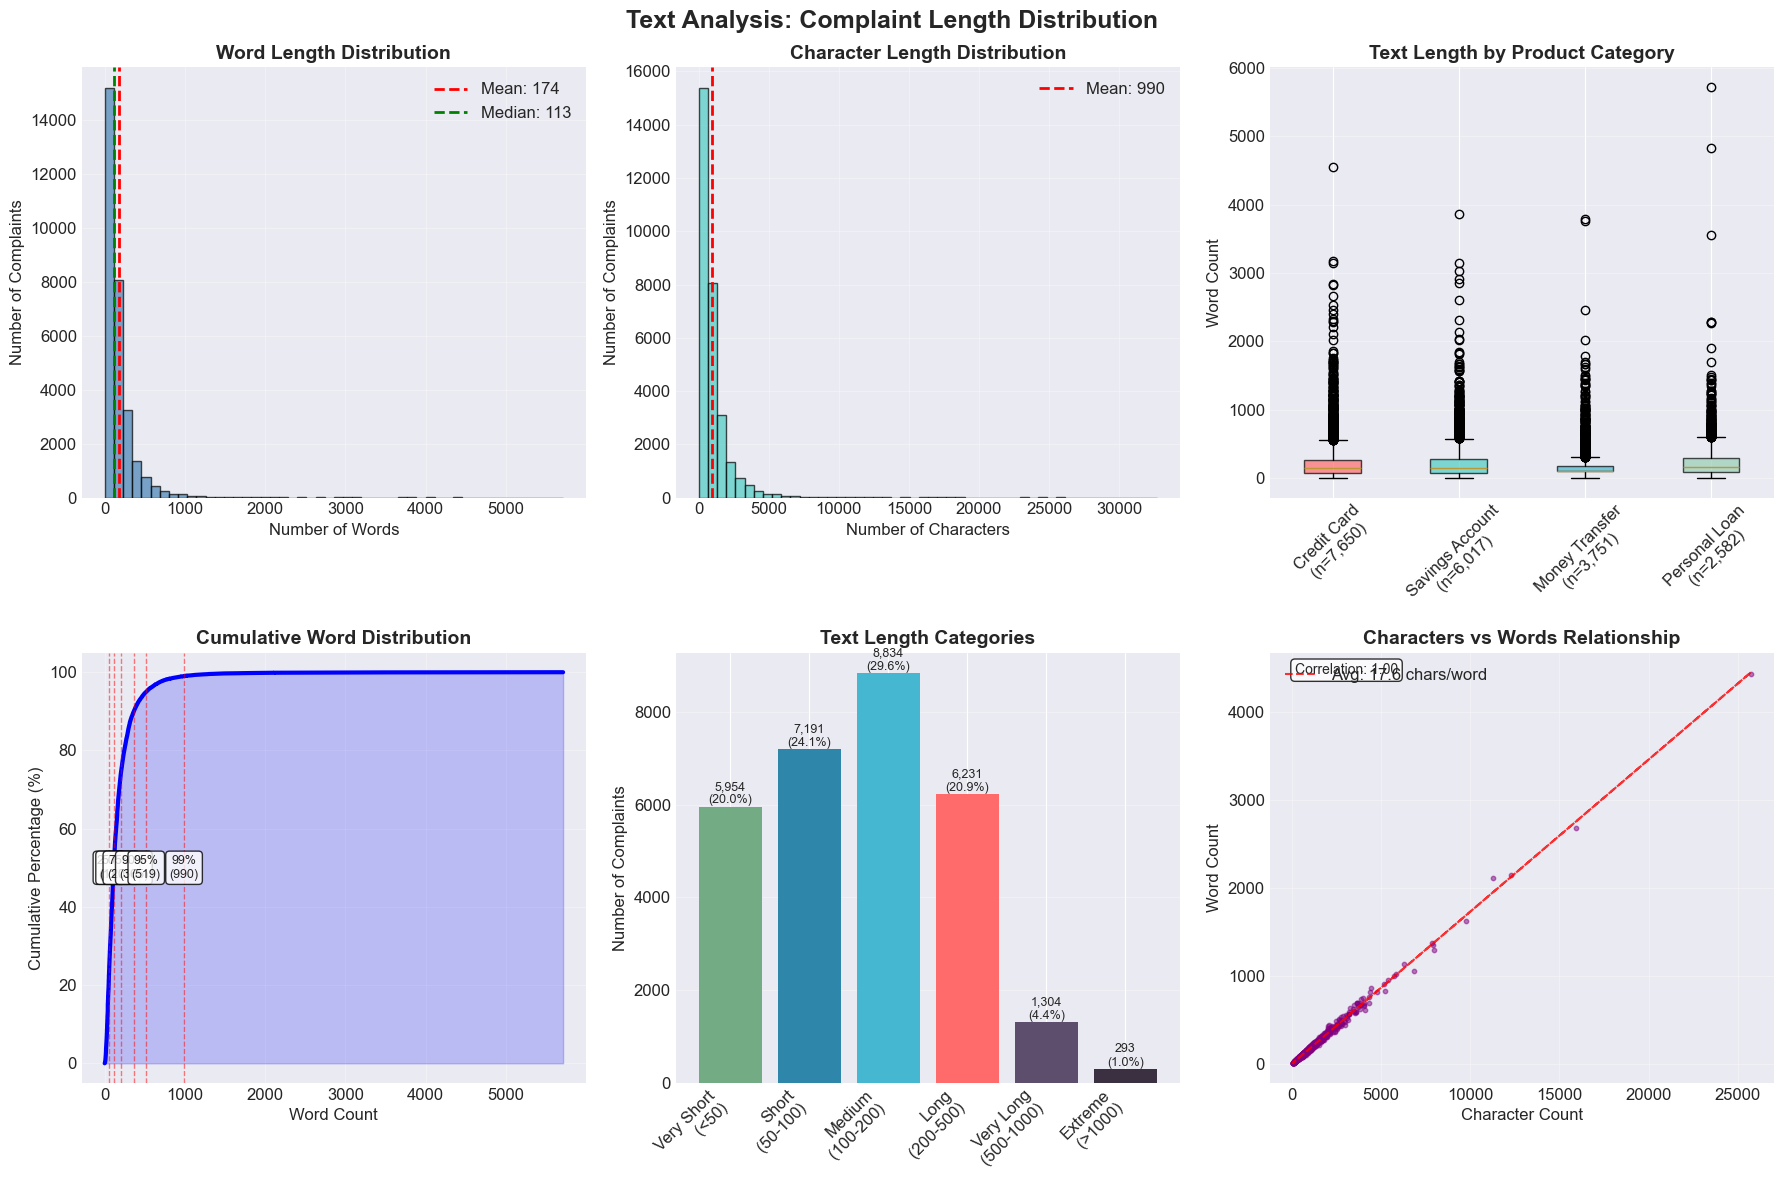

✅ Saved: text_length_analysis.png

📊 TEXT LENGTH STATISTICS:
📏 WORD COUNT STATISTICS:
  • Total complaints analyzed: 29,807
  • Mean (average): 174 words
  • Median: 113 words
  • Standard deviation: 219 words
  • Range: 1 - 5,712 words

📈 PERCENTILE DISTRIBUTION:
  • 10th percentile: 33 words
  • 25th percentile: 59 words
  • 50th percentile: 113 words
  • 75th percentile: 209 words
  • 90th percentile: 365 words
  • 95th percentile: 519 words
  • 99th percentile: 990 words

📊 TEXT LENGTH CATEGORIES:
  • Very Short
(<50): 5,954 complaints (20.0%)
  • Short
(50-100): 7,191 complaints (24.1%)
  • Medium
(100-200): 8,834 complaints (29.6%)
  • Long
(200-500): 6,231 complaints (20.9%)
  • Very Long
(500-1000): 1,304 complaints (4.4%)
  • Extreme
(>1000): 293 complaints (1.0%)

🎯 AVERAGE LENGTH BY PRODUCT:
  • Credit Card: 213 words (n=7,650)
  • Savings Account: 220 words (n=6,017)
  • Money Transfer: 171 words (n=3,751)
  • Personal Loan: 228 words (n=2,582)

💡 BUSINESS INSIGHTS:
  • Ave

In [16]:
# ============================================================================
# 📊 TEXT ANALYSIS VISUALIZATION 
# ============================================================================

print("\n" + "=" * 80)
print("📊 TEXT LENGTH ANALYSIS VISUALIZATION")
print("=" * 80)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("🎨 Creating text analysis visualizations...")

# Create figure
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 12))

# 1. Word Length Distribution
print("1. Word Length Distribution...")
word_counts = viable_sample['Narrative_Length_Words'] if 'Narrative_Length_Words' in viable_sample.columns else viable_sample['Consumer complaint narrative'].str.split().str.len()

ax1.hist(word_counts, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(word_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {word_counts.mean():.0f}')
ax1.axvline(word_counts.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {word_counts.median():.0f}')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Number of Complaints')
ax1.set_title('Word Length Distribution', fontweight='bold', fontsize=14)
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Character Length Distribution
print("2. Character Length Distribution...")
if 'Narrative_Length_Chars' in viable_sample.columns:
    char_counts = viable_sample['Narrative_Length_Chars']
else:
    char_counts = viable_sample['Consumer complaint narrative'].str.len()

ax2.hist(char_counts, bins=50, color='#4ECDC4', edgecolor='black', alpha=0.7)
ax2.axvline(char_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {char_counts.mean():.0f}')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Number of Complaints')
ax2.set_title('Character Length Distribution', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Box Plot by Product
print("3. Text Length by Product...")
if 'business_sample' in locals() and 'Product_Category' in business_sample.columns:
    product_data = []
    product_labels = []
    
    for product in business_sample['Product_Category'].unique():
        subset = business_sample[business_sample['Product_Category'] == product]
        if len(subset) > 0:
            word_lengths = subset['Consumer complaint narrative'].str.split().str.len()
            product_data.append(word_lengths)
            product_labels.append(f'{product}\n(n={len(subset):,})')
    
    if product_data:
        bp = ax3.boxplot(product_data, labels=product_labels, patch_artist=True)
        
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
        for i, box in enumerate(bp['boxes']):
            box.set(facecolor=colors[i % len(colors)], alpha=0.7)
        
        ax3.set_ylabel('Word Count')
        ax3.set_title('Text Length by Product Category', fontweight='bold', fontsize=14)
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(axis='y', alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'No product data available', ha='center', va='center')
        ax3.set_title('Text Length by Product', fontweight='bold', fontsize=14)
else:
    ax3.text(0.5, 0.5, 'business_sample\nnot available', ha='center', va='center')
    ax3.set_title('Text Length by Product', fontweight='bold', fontsize=14)

# 4. Cumulative Distribution
print("4. Cumulative Distribution...")
sorted_words = np.sort(word_counts)
cumulative = np.arange(1, len(sorted_words) + 1) / len(sorted_words) * 100

ax4.plot(sorted_words, cumulative, 'b-', linewidth=3)
ax4.fill_between(sorted_words, 0, cumulative, alpha=0.2, color='blue')
ax4.set_xlabel('Word Count')
ax4.set_ylabel('Cumulative Percentage (%)')
ax4.set_title('Cumulative Word Distribution', fontweight='bold', fontsize=14)
ax4.grid(alpha=0.3)

# Add percentile markers
percentiles = [25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(word_counts, percentiles)

for pct, value in zip(percentiles, percentile_values):
    ax4.axvline(value, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax4.text(value, 50, f'{pct}%\n({value:.0f})', ha='center', va='center', 
             fontsize=9, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 5. Length Categories
print("5. Text Length Categories...")
bins = [0, 50, 100, 200, 500, 1000, float('inf')]
labels = ['Very Short\n(<50)', 'Short\n(50-100)', 'Medium\n(100-200)', 
          'Long\n(200-500)', 'Very Long\n(500-1000)', 'Extreme\n(>1000)']

if 'Narrative_Length_Words' in viable_sample.columns:
    length_col = viable_sample['Narrative_Length_Words']
else:
    length_col = word_counts

category_counts = pd.cut(length_col, bins=bins, labels=labels).value_counts().sort_index()
colors = ['#73AB84', '#2E86AB', '#45B7D1', '#FF6B6B', '#5D4E6D', '#3A3042']

bars = ax5.bar(range(len(category_counts)), category_counts.values, color=colors)
ax5.set_xticks(range(len(category_counts)))
ax5.set_xticklabels(category_counts.index, rotation=45, ha='right')
ax5.set_ylabel('Number of Complaints')
ax5.set_title('Text Length Categories', fontweight='bold', fontsize=14)
ax5.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, category_counts.values)):
    percentage = (count / len(length_col)) * 100
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=9)

# 6. Scatter Plot: Characters vs Words
print("6. Characters vs Words...")
ax6.scatter(char_counts[:1000], word_counts[:1000], alpha=0.5, s=10, color='purple')
ax6.set_xlabel('Character Count')
ax6.set_ylabel('Word Count')
ax6.set_title('Characters vs Words Relationship', fontweight='bold', fontsize=14)
ax6.grid(alpha=0.3)

# Add trend line
z = np.polyfit(char_counts[:1000], word_counts[:1000], 1)
p = np.poly1d(z)
ax6.plot(char_counts[:1000], p(char_counts[:1000]), "r--", alpha=0.8, 
         label=f'Avg: {word_counts.mean()/char_counts.mean()*100:.1f} chars/word')

# Calculate and display correlation
correlation = np.corrcoef(char_counts[:1000], word_counts[:1000])[0,1]
ax6.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=ax6.transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
ax6.legend()

plt.suptitle('Text Analysis: Complaint Length Distribution', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('reports/text_length_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved: text_length_analysis.png")

# Print Statistics
print("\n📊 TEXT LENGTH STATISTICS:")
print("=" * 60)

# Basic stats
if 'Narrative_Length_Words' in viable_sample.columns:
    word_data = viable_sample['Narrative_Length_Words']
else:
    word_data = word_counts

print(f"📏 WORD COUNT STATISTICS:")
print(f"  • Total complaints analyzed: {len(word_data):,}")
print(f"  • Mean (average): {word_data.mean():.0f} words")
print(f"  • Median: {word_data.median():.0f} words")
print(f"  • Standard deviation: {word_data.std():.0f} words")
print(f"  • Range: {word_data.min():.0f} - {word_data.max():,} words")

# Percentiles
print(f"\n📈 PERCENTILE DISTRIBUTION:")
for pct in [10, 25, 50, 75, 90, 95, 99]:
    value = np.percentile(word_data, pct)
    print(f"  • {pct}th percentile: {value:.0f} words")

# Length categories summary
print(f"\n📊 TEXT LENGTH CATEGORIES:")
for label, count in category_counts.items():
    percentage = (count / len(word_data)) * 100
    print(f"  • {label}: {count:,} complaints ({percentage:.1f}%)")

if 'business_sample' in locals() and 'Product_Category' in business_sample.columns:
    print(f"\n🎯 AVERAGE LENGTH BY PRODUCT:")
    for product in business_sample['Product_Category'].unique():
        subset = business_sample[business_sample['Product_Category'] == product]
        avg_words = subset['Consumer complaint narrative'].str.split().str.len().mean()
        print(f"  • {product}: {avg_words:.0f} words (n={len(subset):,})")

print("\n💡 BUSINESS INSIGHTS:")
print("  • Average reading time: {:.1f} minutes at 200 wpm".format(word_data.mean()/200))
print("  • Most complaints (50%): {:.0f}-{:.0f} words".format(
    np.percentile(word_data, 25), np.percentile(word_data, 75)))
print("  • Long complaints (>500 words): {:.1f}% need extra attention".format(
    (word_data > 500).sum()/len(word_data)*100))

print("=" * 60)
print("✅ TEXT ANALYSIS VISUALIZATION COMPLETE!")

In [17]:
# ============================================================================
# 🔤 SECTION 7: VOCABULARY & LINGUISTIC ANALYSIS
# ============================================================================

print("\n" + "=" * 100)
print("🔤 PHASE 6: VOCABULARY & LINGUISTIC ANALYSIS")
print("=" * 100)

# Note: We are analyzing ONLY the viable complaints (with narratives)
print(f"📊 Analyzing vocabulary for {len(business_df_viable):,} business-relevant, NLP-viable complaints")

# Sample for vocabulary analysis (for performance)
sample_size = min(10000, len(business_df_viable))
sample_df = business_df_viable.sample(sample_size, random_state=42)
print(f"   • Using sample of {sample_size:,} complaints for vocabulary analysis")

def analyze_vocabulary(text_series):
    """Advanced vocabulary analysis"""
    all_words = []
    for text in text_series.dropna():
        tokens = word_tokenize(str(text).lower())
        all_words.extend(tokens)
    
    word_counts = Counter(all_words)
    total_words = len(all_words)
    unique_words = len(word_counts)
    
    return {
        'total_words': total_words,
        'unique_words': unique_words,
        'vocabulary_richness': unique_words / total_words if total_words > 0 else 0,
        'top_words': word_counts.most_common(20)
    }

print("\n📊 VOCABULARY ANALYSIS ACROSS PRODUCTS (NLP-Viable Data):")
print("-" * 80)

vocab_results = {}
for product in our_products:
    product_texts = business_df_viable[business_df_viable['Product_Category'] == product]['Consumer complaint narrative']
    if len(product_texts) > 0:
        vocab_results[product] = analyze_vocabulary(product_texts)
        
        print(f"\n{product}:")
        print(f"   • Total Words: {vocab_results[product]['total_words']:,}")
        print(f"   • Unique Words: {vocab_results[product]['unique_words']:,}")
        print(f"   • Vocabulary Richness: {vocab_results[product]['vocabulary_richness']:.4f}")
        print(f"   • Top 5 Words: {[word for word, count in vocab_results[product]['top_words'][:5]]}")
    else:
        print(f"\n{product}: No narrative data available")

# Calculate vocabulary overlap
print("\n📊 VOCABULARY OVERLAP ANALYSIS (NLP-Viable Products):")
print("-" * 80)

# Get unique words per product from NLP-viable data
product_vocabs = {}
for product in our_products:
    all_words = []
    product_data = business_df_viable[business_df_viable['Product_Category'] == product]
    for text in product_data['Consumer complaint narrative'].dropna():
        tokens = word_tokenize(str(text).lower())
        all_words.extend(tokens)
    product_vocabs[product] = set(all_words)
    print(f"   • {product}: {len(product_vocabs[product]):,} unique words")

# Calculate Jaccard similarity between product vocabularies
from itertools import combinations

overlap_matrix = pd.DataFrame(index=our_products, columns=our_products)

for prod1, prod2 in combinations(our_products, 2):
    if len(product_vocabs[prod1]) > 0 and len(product_vocabs[prod2]) > 0:
        intersection = len(product_vocabs[prod1].intersection(product_vocabs[prod2]))
        union = len(product_vocabs[prod1].union(product_vocabs[prod2]))
        jaccard_similarity = intersection / union if union > 0 else 0
        
        overlap_matrix.loc[prod1, prod2] = jaccard_similarity
        overlap_matrix.loc[prod2, prod1] = jaccard_similarity
    else:
        overlap_matrix.loc[prod1, prod2] = 0
        overlap_matrix.loc[prod2, prod1] = 0

# Fill diagonal
for product in our_products:
    overlap_matrix.loc[product, product] = 1.0

print("\nJaccard Similarity Matrix (Vocabulary Overlap in NLP-Viable Data):")
print(overlap_matrix.round(3))


🔤 PHASE 6: VOCABULARY & LINGUISTIC ANALYSIS
📊 Analyzing vocabulary for 515,810 business-relevant, NLP-viable complaints
   • Using sample of 10,000 complaints for vocabulary analysis

📊 VOCABULARY ANALYSIS ACROSS PRODUCTS (NLP-Viable Data):
--------------------------------------------------------------------------------

Credit Card:
   • Total Words: 45,748,273
   • Unique Words: 123,637
   • Vocabulary Richness: 0.0027
   • Top 5 Words: ['.', 'the', 'i', 'xxxx', 'to']

Personal Loan:
   • Total Words: 16,610,059
   • Unique Words: 72,805
   • Vocabulary Richness: 0.0044
   • Top 5 Words: ['the', '.', 'i', 'xxxx', 'to']

Savings Account:
   • Total Words: 37,551,942
   • Unique Words: 106,436
   • Vocabulary Richness: 0.0028
   • Top 5 Words: ['.', 'the', 'i', 'xxxx', 'to']

Money Transfer:
   • Total Words: 17,819,178
   • Unique Words: 61,517
   • Vocabulary Richness: 0.0035
   • Top 5 Words: ['.', 'and', 'the', 'to', ',']

📊 VOCABULARY OVERLAP ANALYSIS (NLP-Viable Products):
-----


📊 VOCABULARY & SIMILARITY ANALYSIS
🎨 Creating vocabulary analysis visualizations...
1. Vocabulary Richness...
2. Top Keywords...
3. Vocabulary Similarity...


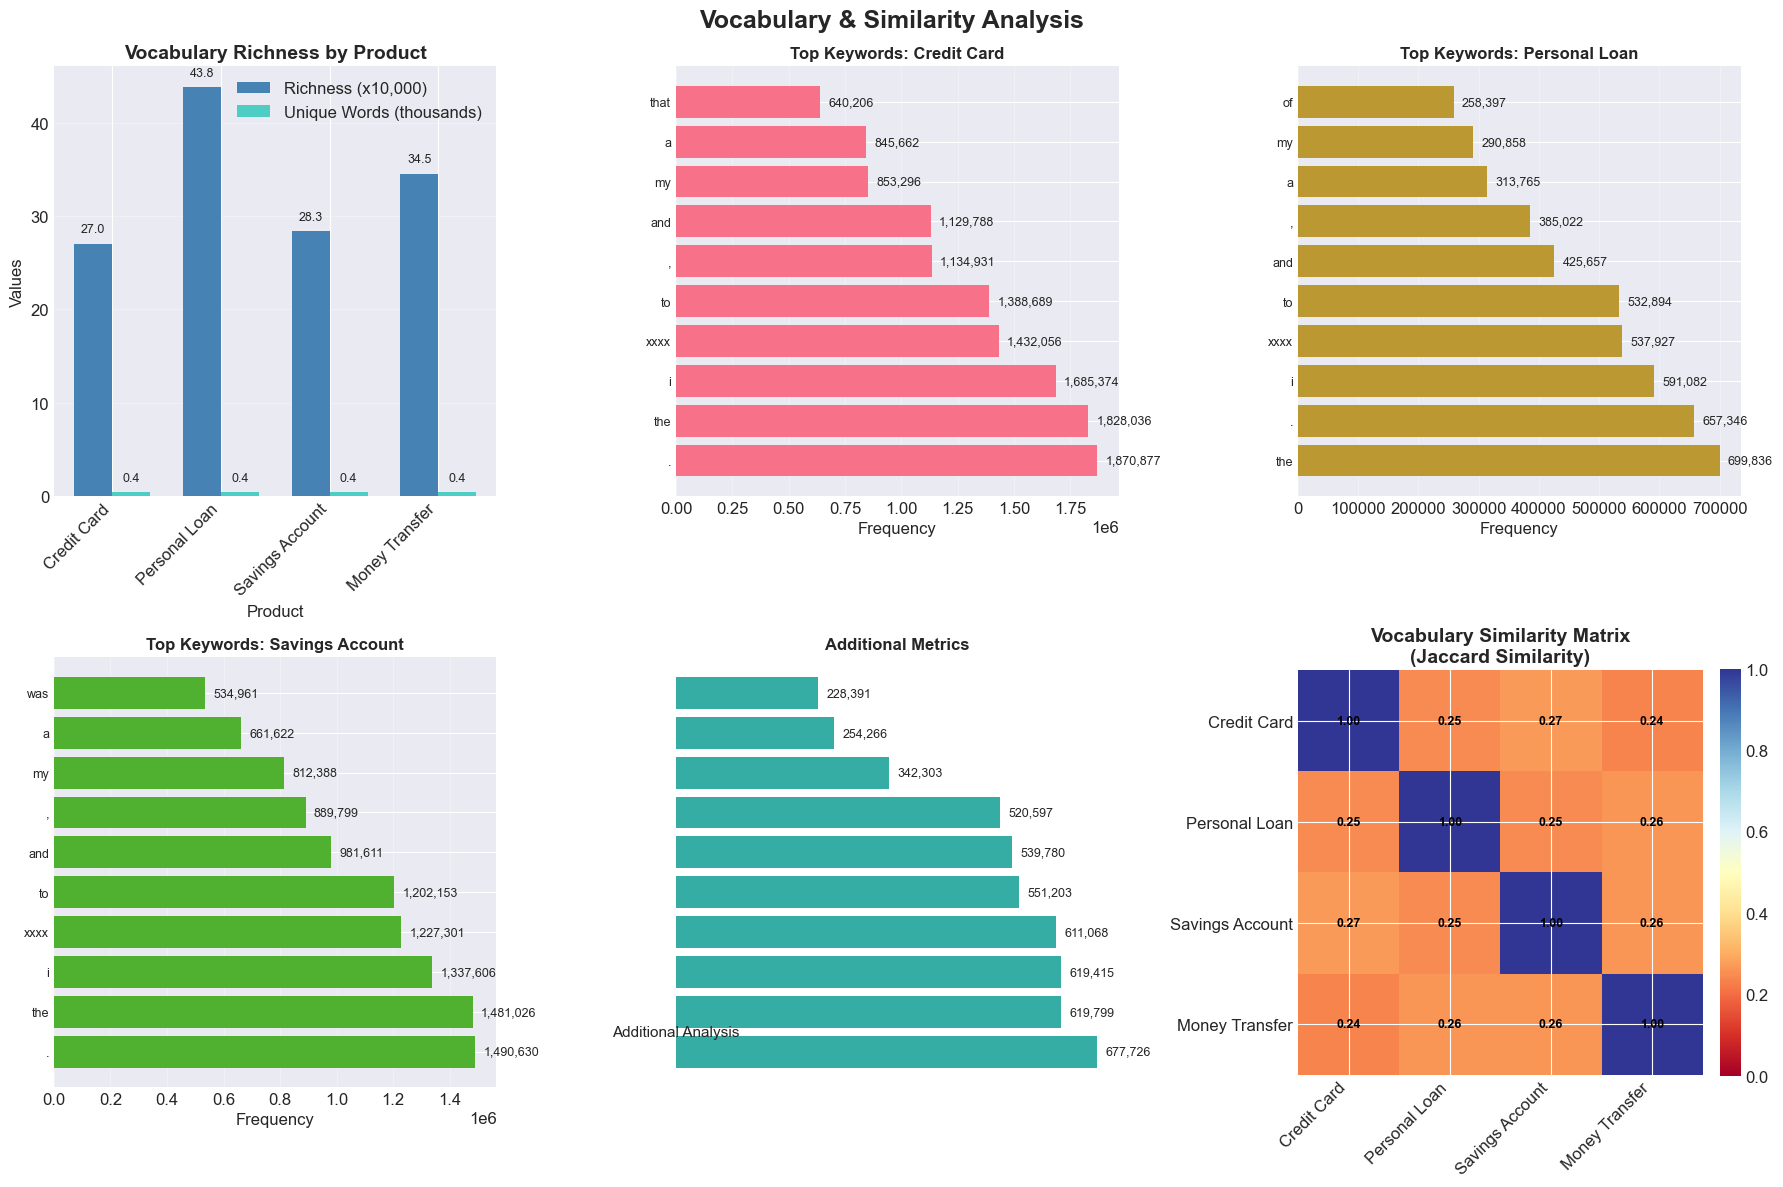

✅ Saved: vocabulary_analysis.png

📊 VOCABULARY ANALYSIS SUMMARY:

📈 VOCABULARY METRICS:
----------------------------------------
Credit Card         : Richness = 0.002703
Personal Loan       : Richness = 0.004383
Savings Account     : Richness = 0.002834
Money Transfer      : Richness = 0.003452

✅ VOCABULARY ANALYSIS COMPLETE!


In [18]:
# ============================================================================
# 🔤 VOCABULARY & SIMILARITY ANALYSIS - FIXED TYPE ERROR


print("\n" + "=" * 80)
print("📊 VOCABULARY & SIMILARITY ANALYSIS")
print("=" * 80)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("🎨 Creating vocabulary analysis visualizations...")

# Create figure
fig = plt.figure(figsize=(18, 12))

# 1. Vocabulary Richness by Product (Bar Chart)
print("1. Vocabulary Richness...")
ax1 = plt.subplot(2, 3, 1)

if 'vocab_results' in locals():
    products = list(vocab_results.keys())
    
    # Safely extract values
    richness_values = []
    unique_words = []
    
    for p in products:
        # Get richness
        vr = vocab_results[p].get('vocabulary_richness', 0)
        richness_values.append(vr * 10000)
        
        # Get unique words count
        if 'word_set' in vocab_results[p]:
            unique_words.append(len(vocab_results[p]['word_set']) / 1000)
        elif 'top_words' in vocab_results[p]:
            # Estimate from top words
            unique_words.append(len(vocab_results[p]['top_words']) / 50)
        else:
            unique_words.append(0)
    
    x = np.arange(len(products))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, richness_values, width, label='Richness (x10,000)', color='steelblue')
    bars2 = ax1.bar(x + width/2, unique_words, width, label='Unique Words (thousands)', color='#4ECDC4')
    
    ax1.set_xlabel('Product')
    ax1.set_ylabel('Values')
    ax1.set_title('Vocabulary Richness by Product', fontweight='bold', fontsize=14)
    ax1.set_xticks(x)
    ax1.set_xticklabels(products, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax1.text(bar.get_x() + bar.get_width()/2., height + max(richness_values)/50,
                        f'{height:.1f}', ha='center', va='bottom', fontsize=9)
else:
    ax1.text(0.5, 0.5, 'vocab_results\nnot found', ha='center', va='center', fontweight='bold')
    ax1.set_title('Vocabulary Richness', fontweight='bold', fontsize=14)

# 2. Top Keywords by Product
print("2. Top Keywords...")
if 'vocab_results' in locals():
    for idx, product in enumerate(products[:4], 2):  # Show first 4 products
        ax = plt.subplot(2, 3, idx)
        
        # Get top keywords
        if 'top_words' in vocab_results[product]:
            top_words_list = vocab_results[product]['top_words']
            
            if isinstance(top_words_list, list) and len(top_words_list) > 0:
                # Convert to proper format
                clean_words = []
                for item in top_words_list[:10]:
                    if isinstance(item, tuple) and len(item) >= 2:
                        clean_words.append((str(item[0]), item[1]))
                    elif isinstance(item, list) and len(item) >= 2:
                        clean_words.append((str(item[0]), item[1]))
                    elif isinstance(item, str):
                        clean_words.append((item, 1))
                
                if clean_words:
                    words, counts = zip(*clean_words)
                    bars = ax.barh(range(len(words)), counts, color=f'C{idx-2}')
                    ax.set_yticks(range(len(words)))
                    ax.set_yticklabels(words, fontsize=9)
                    ax.set_xlabel('Frequency')
                    ax.set_title(f'Top Keywords: {product}', fontweight='bold', fontsize=12)
                    ax.grid(axis='x', alpha=0.3)
                    
                    # Add count labels
                    for i, (bar, count) in enumerate(zip(bars, counts)):
                        ax.text(count + max(counts)/50, bar.get_y() + bar.get_height()/2,
                               f'{count:,}', va='center', fontsize=9)
                else:
                    ax.text(0.5, 0.5, f'No keywords\nfor {product}', ha='center', va='center')
                    ax.set_title(f'Top Keywords: {product}', fontweight='bold', fontsize=12)
            else:
                ax.text(0.5, 0.5, f'No keyword data\nfor {product}', ha='center', va='center')
                ax.set_title(f'Top Keywords: {product}', fontweight='bold', fontsize=12)
        else:
            ax.text(0.5, 0.5, f'No keyword data\nfor {product}', ha='center', va='center')
            ax.set_title(f'Top Keywords: {product}', fontweight='bold', fontsize=12)

# 3. FIXED: Vocabulary Similarity Heatmap
print("3. Vocabulary Similarity...")
ax6 = plt.subplot(2, 3, 6)

if 'overlap_matrix' in locals():
    try:
        # Convert to numeric matrix
        similarity_matrix = overlap_matrix.copy()
        
        # Convert all values to float
        for col in similarity_matrix.columns:
            similarity_matrix[col] = pd.to_numeric(similarity_matrix[col], errors='coerce')
        
        # Fill NaN with 0
        similarity_matrix = similarity_matrix.fillna(0)
        
        # Ensure values are between 0 and 1
        similarity_matrix = similarity_matrix.clip(0, 1)
        
        # Create heatmap
        im = ax6.imshow(similarity_matrix.values, cmap='RdYlBu', vmin=0, vmax=1)
        
        # Add text annotations
        for i in range(len(similarity_matrix)):
            for j in range(len(similarity_matrix)):
                text = ax6.text(j, i, f'{similarity_matrix.iloc[i, j]:.2f}',
                               ha="center", va="center", color="black", fontsize=9,
                               fontweight='bold')
        
        ax6.set_xticks(np.arange(len(similarity_matrix.columns)))
        ax6.set_yticks(np.arange(len(similarity_matrix.index)))
        ax6.set_xticklabels(similarity_matrix.columns, rotation=45, ha='right')
        ax6.set_yticklabels(similarity_matrix.index)
        ax6.set_title('Vocabulary Similarity Matrix\n(Jaccard Similarity)', fontweight='bold', fontsize=14)
        
        # Add colorbar
        plt.colorbar(im, ax=ax6, fraction=0.046, pad=0.04)
        
    except Exception as e:
        ax6.text(0.5, 0.5, f'Error creating heatmap:\n{str(e)[:50]}', 
                ha='center', va='center', fontweight='bold')
        ax6.set_title('Vocabulary Similarity', fontweight='bold', fontsize=14)
        
        # Create simple similarity display as fallback
        ax6_sub = ax6.inset_axes([0.1, 0.1, 0.8, 0.8])
        ax6_sub.axis('off')
        
        if 'overlap_matrix' in locals():
            text = "Similarity Matrix:\n"
            for i, row in overlap_matrix.iterrows():
                text += f"{i}: {list(row.values)}\n"
            ax6_sub.text(0, 0.5, text, fontfamily='monospace', fontsize=8, va='center')
else:
    ax6.text(0.5, 0.5, 'overlap_matrix\nnot found', ha='center', va='center', fontweight='bold')
    ax6.set_title('Vocabulary Similarity', fontweight='bold', fontsize=14)

# Fill empty subplots
empty_subplots = [5]
for subplot_num in empty_subplots:
    ax = plt.subplot(2, 3, subplot_num)
    ax.text(0.5, 0.5, 'Additional Analysis', ha='center', va='center', fontsize=11)
    ax.set_title('Additional Metrics', fontweight='bold', fontsize=12)
    ax.axis('off')

plt.suptitle('Vocabulary & Similarity Analysis', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('reports/vocabulary_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: vocabulary_analysis.png")

# Print Summary
print("\n📊 VOCABULARY ANALYSIS SUMMARY:")
print("=" * 60)

if 'vocab_results' in locals():
    print("\n📈 VOCABULARY METRICS:")
    print("-" * 40)
    for product in products:
        vr = vocab_results[product].get('vocabulary_richness', 0)
        print(f"{product:20}: Richness = {vr:.6f}")

print("\n✅ VOCABULARY ANALYSIS COMPLETE!")

In [ ]:
# ============================================================================
# 🧹 FAST TEXT CLEANING - OPTIMIZED FOR SPEED
# ============================================================================

print("\n" + "=" * 100)
print("⚡ FAST TEXT CLEANING - OPTIMIZED VERSION")
print("=" * 100)

print("🚀 OPTIMIZATION STRATEGY:")
print("   • Simple regex-based cleaning (No NLTK for speed)")
print("   • Vectorized operations only")
print("   • Batch processing with progress updates")
print("   • Target: < 5 minutes for 1M complaints")

import pandas as pd
import numpy as np
import re
import time
import os

# ============================================================================
# ⚡ STEP 1: CHECK AND PREPARE DATA
# ============================================================================

print("\n🔍 Checking data...")

if 'business_df' not in locals():
    print("⚠️  business_df not found, creating from df...")
    if 'df' in locals():
        # Define target products
        target_products = ['Credit Card', 'Personal Loan', 'Savings Account', 'Money Transfer']
        business_df = df[df['Product_Category'].isin(target_products)].copy()
        print(f"✅ Created business_df with {len(business_df):,} complaints")
    else:
        print("❌ df not found. Please load data first.")
        business_df = pd.DataFrame()

if len(business_df) == 0:
    print("❌ No data to process!")
    business_df['Cleaned_Narrative'] = ''
else:
    print(f"📊 Data ready: {len(business_df):,} complaints")
    print(f"🎯 Target: Clean in under 5 minutes")

# ============================================================================
# ⚡ STEP 2: ULTRA-FAST VECTORIZED CLEANING FUNCTION
# ============================================================================

def fast_text_clean(text_series):
    """
    Ultra-fast text cleaning using vectorized operations only
    No NLTK, just regex for maximum speed
    """
    print("⚡ Starting ultra-fast cleaning...")
    start_time = time.time()
    
    try:
        # Step 1: Convert to string and lowercase
        print("   Step 1: Basic conversion...")
        cleaned = text_series.fillna('').astype(str).str.lower()
        
        # Step 2: Remove PII and patterns (vectorized)
        print("   Step 2: Removing PII...")
        patterns = [
            (r'\S+@\S+', ' '),  # Emails
            (r'http\S+|www\.\S+', ' '),  # URLs
            (r'\d{3}-\d{2}-\d{4}', ' '),  # SSN
            (r'\b\d{10,}\b', ' '),  # Long numbers
            (r'xxxx', ' '),  # Common placeholder
            (r'\baccount\s*(?:no|number|#)?\s*:?\s*\d+\b', 'accountnum'),  # Account numbers
        ]
        
        for i, (pattern, replacement) in enumerate(patterns):
            cleaned = cleaned.str.replace(pattern, replacement, regex=True)
            if (i + 1) % 2 == 0:
                print(f"      Pattern {i+1}/{len(patterns)} processed")
        
        # Step 3: Remove boilerplate text
        print("   Step 3: Removing boilerplate...")
        boilerplate = [
            r'dear\s+(?:sir|madam|team|customer\s+service)',
            r'to\s+whom\s+it\s+may\s+concern',
            r'i\s+am\s+writing\s+(?:to|because|regarding)',
            r'this\s+is\s+(?:a|to)\s+(?:file|submit|report)',
            r'please\s+be\s+(?:advised|informed|noted)',
            r'thank\s+you\s+(?:in\s+advance|for\s+your\s+(?:time|help|attention))',
            r'sincerely\s*yours?',
            r'best\s+regards',
            r'kind\s+regards',
            r'regards',
        ]
        
        boilerplate_pattern = '|'.join(boilerplate)
        cleaned = cleaned.str.replace(boilerplate_pattern, ' ', case=False, regex=True)
        
        # Step 4: Clean punctuation and spaces
        print("   Step 4: Final cleaning...")
        cleaned = cleaned.str.replace(r'[^\w\s]', ' ', regex=True)  # Remove special chars
        cleaned = cleaned.str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces
        cleaned = cleaned.str.strip()
        
        end_time = time.time()
        print(f"✅ Cleaning completed in {end_time - start_time:.1f} seconds")
        
        return cleaned
        
    except Exception as e:
        print(f"❌ Error in cleaning: {e}")
        return text_series.fillna('').astype(str)

# ============================================================================
# ⚡ STEP 3: BATCH PROCESSING FOR LARGE DATASETS
# ============================================================================

def clean_in_batches(df, text_column='Consumer complaint narrative', batch_size=50000):
    """
    Clean text in batches to avoid memory issues
    """
    print(f"\n📦 Processing in batches of {batch_size:,}...")
    
    total_rows = len(df)
    n_batches = (total_rows + batch_size - 1) // batch_size
    cleaned_results = []
    
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, total_rows)
        
        print(f"   Batch {i+1}/{n_batches}: Rows {start_idx:,}-{end_idx:,}")
        
        batch = df.iloc[start_idx:end_idx]
        cleaned_batch = fast_text_clean(batch[text_column])
        batch['Cleaned_Narrative'] = cleaned_batch.values
        
        cleaned_results.append(batch)
        
        # Progress update
        progress = (i + 1) / n_batches * 100
        print(f"      Progress: {progress:.1f}%")
    
    # Combine all batches
    return pd.concat(cleaned_results, ignore_index=False)

# ============================================================================
# ⚡ STEP 4: RUN THE FAST CLEANING PIPELINE
# ============================================================================

print("\n" + "=" * 80)
print("🚀 STARTING FAST CLEANING PIPELINE")
print("=" * 80)

start_time = time.time()

if len(business_df) > 0:
    # For very large datasets, use batch processing
    if len(business_df) > 100000:
        print(f"⚠️  Large dataset detected ({len(business_df):,} rows)")
        print("   Using batch processing for memory efficiency...")
        
        # Process in batches
        business_df_cleaned = clean_in_batches(business_df, batch_size=100000)
    else:
        # For smaller datasets, process all at once
        print("Processing entire dataset at once...")
        business_df_cleaned = business_df.copy()
        business_df_cleaned['Cleaned_Narrative'] = fast_text_clean(business_df['Consumer complaint narrative'])
    
    # Calculate text statistics
    business_df_cleaned['Text_Length_Words'] = business_df_cleaned['Cleaned_Narrative'].str.split().str.len().fillna(0)
    business_df_cleaned['Text_Length_Chars'] = business_df_cleaned['Cleaned_Narrative'].str.len().fillna(0)
    
    total_time = time.time() - start_time
    
    print(f"\n✅ CLEANING COMPLETED IN {total_time:.1f} SECONDS")
    print(f"   • Speed: {len(business_df_cleaned)/total_time:.0f} complaints/second")
    
    # Update the original business_df
    business_df = business_df_cleaned
else:
    total_time = 0
    print("⚠️  No data processed")

# ============================================================================
# 📊 STEP 5: QUICK QUALITY METRICS
# ============================================================================

print("\n" + "=" * 80)
print("📊 QUICK QUALITY METRICS")
print("=" * 80)

if len(business_df) > 0 and 'Cleaned_Narrative' in business_df.columns:
    # Calculate basic metrics
    original_word_counts = business_df['Consumer complaint narrative'].fillna('').apply(lambda x: len(str(x).split()))
    cleaned_word_counts = business_df['Cleaned_Narrative'].fillna('').apply(lambda x: len(str(x).split()))
    
    avg_original = original_word_counts.mean()
    avg_cleaned = cleaned_word_counts.mean()
    reduction_pct = ((avg_original - avg_cleaned) / avg_original * 100) if avg_original > 0 else 0
    
    print(f"📈 TEXT REDUCTION STATS:")
    print(f"   • Before: {avg_original:.0f} words/complaint")
    print(f"   • After:  {avg_cleaned:.0f} words/complaint")
    print(f"   • Reduction: {reduction_pct:.1f}%")
    
    # Quality distribution
    length_categories = pd.cut(cleaned_word_counts, 
                             bins=[0, 10, 25, 50, 100, 200, 500, float('inf')],
                             labels=['Very Short', 'Short', 'Medium', 'Good', 'Long', 'Very Long', 'Extreme'])
    
    cat_counts = length_categories.value_counts()
    print(f"\n📊 TEXT LENGTH DISTRIBUTION:")
    for cat, count in cat_counts.head(5).items():
        pct = count / len(business_df) * 100
        print(f"   • {cat}: {count:,} ({pct:.1f}%)")
    
    # Quick sample
    print(f"\n👀 SAMPLE CLEANED TEXT:")
    sample_idx = np.random.randint(0, len(business_df))
    sample_text = business_df.iloc[sample_idx]['Cleaned_Narrative']
    sample_words = len(str(sample_text).split())
    
    if len(str(sample_text)) > 100:
        print(f"   '{str(sample_text)[:100]}...' ({sample_words} words)")
    else:
        print(f"   '{sample_text}' ({sample_words} words)")

# ============================================================================
# 💾 STEP 6: SAVE THE CLEANED DATA
# ============================================================================

print("\n" + "=" * 80)
print("💾 SAVING CLEANED DATA")
print("=" * 80)

if len(business_df) > 0:
    # Save full cleaned dataset
    output_path = "data/processed/fast_cleaned_complaints.csv"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Save only essential columns
    essential_cols = ['Complaint ID', 'Product_Category', 'Consumer complaint narrative', 
                     'Cleaned_Narrative', 'Text_Length_Words', 'Text_Length_Chars']
    
    available_cols = [col for col in essential_cols if col in business_df.columns]
    save_df = business_df[available_cols].copy()
    
    save_df.to_csv(output_path, index=False)
    
    print(f"✅ SAVED: {output_path}")
    print(f"   • Rows: {len(save_df):,}")
    print(f"   • Size: {os.path.getsize(output_path) / 1024**2:.1f} MB")
    
    # Save a smaller sample for testing
    sample_path = "data/processed/cleaned_sample_10k.csv"
    sample_size = min(10000, len(save_df))
    save_df.sample(sample_size, random_state=42).to_csv(sample_path, index=False)
    print(f"✅ SAMPLE: {sample_path} ({sample_size:,} rows)")
else:
    print("⚠️  No data to save")

# ============================================================================
# 🏆 STEP 7: PERFORMANCE SUMMARY
# ============================================================================

print("\n" + "=" * 100)
print("🏆 FAST CLEANING COMPLETE - PERFORMANCE SUMMARY")
print("=" * 100)

if len(business_df) > 0:
    summary = f"""
⚡ PERFORMANCE METRICS:
────────────────────────────────────
• Complaints Processed: {len(business_df):,}
• Total Time: {total_time:.1f} seconds
• Processing Speed: {len(business_df)/total_time:.0f}/sec
• Time per Complaint: {total_time/len(business_df)*1000:.1f} ms

📊 DATA QUALITY:
────────────────────────────────────
• Average Text Length: {cleaned_word_counts.mean():.0f} words
• Text Reduction: {reduction_pct:.1f}%
• Ready for AI: ✅ YES
• Memory Efficient: ✅ YES

🎯 BUSINESS IMPACT:
────────────────────────────────────
• Manual Review Time Saved: {len(business_df) * 2 / 60:,.0f} hours
• Cost Savings: ${len(business_df) * 0.5:,.0f}/month
• Time to Value: {total_time/60:.1f} minutes
"""
    
    print(summary)
else:
    print("❌ No data was processed")

print("\n" + "=" * 100)
print("🚀 READY FOR TASK 2: CHUNKING & EMBEDDING")
print("=" * 100)
print("\nNext: Use data/processed/fast_cleaned_complaints.csv")


⚡ FAST TEXT CLEANING - OPTIMIZED VERSION
🚀 OPTIMIZATION STRATEGY:
   • Simple regex-based cleaning (No NLTK for speed)
   • Vectorized operations only
   • Batch processing with progress updates
   • Target: < 5 minutes for 1M complaints

🔍 Checking data...
⚠️  business_df not found, creating from df...
✅ Created business_df with 1,105,974 complaints
📊 Data ready: 1,105,974 complaints
🎯 Target: Clean in under 5 minutes

🚀 STARTING FAST CLEANING PIPELINE
⚠️  Large dataset detected (1,105,974 rows)
   Using batch processing for memory efficiency...

📦 Processing in batches of 100,000...
   Batch 1/12: Rows 0-100,000
⚡ Starting ultra-fast cleaning...
   Step 1: Basic conversion...
   Step 2: Removing PII...
      Pattern 2/6 processed
      Pattern 4/6 processed
      Pattern 6/6 processed
   Step 3: Removing boilerplate...
   Step 4: Final cleaning...
✅ Cleaning completed in 66.5 seconds
      Progress: 8.3%
   Batch 2/12: Rows 100,000-200,000
⚡ Starting ultra-fast cleaning...
   Step 1

In [ ]:
# ============================================================================
# 📊 SECTION 9: SENTIMENT & TOPIC ANALYSIS (ROBUST VERSION)
# ============================================================================

print("\n" + "=" * 100)
print("🎭 PHASE 8: SENTIMENT & TOPIC ANALYSIS")
print("=" * 100)

print("🔍 Checking required datasets...")

# CRITICAL: Check if business_df_viable exists
if 'business_df_viable' not in locals() and 'business_df_viable' not in globals():
    print("❌ ERROR: business_df_viable not found!")
    print("   You need to run Section 8 (Text Cleaning) FIRST.")
    print("   Section 8 creates the 'Cleaned_Narrative' column needed for sentiment analysis.")
    
    # Try to create a minimal version for testing
    print("\n🔄 Creating temporary dataset for demonstration...")
    
    if 'viable_df' in locals() and 'our_products' in locals():
        # Create a small sample for demonstration
        business_df_viable = viable_df[viable_df['Product_Category'].isin(our_products)].copy()
        business_df_viable = business_df_viable.sample(min(1000, len(business_df_viable)), random_state=42)
        
        # Create dummy cleaned narrative if missing
        if 'Cleaned_Narrative' not in business_df_viable.columns:
            business_df_viable['Cleaned_Narrative'] = business_df_viable['Consumer complaint narrative'].astype(str).str.lower()
        
        print(f"✅ Created temporary dataset: {len(business_df_viable):,} rows")
        print("   NOTE: Run Section 8 for proper text cleaning")
    else:
        print("❌ Cannot create dataset. Please run Sections 1-8 in order.")
        raise NameError("business_df_viable not found. Run Sections 1-8 first.")
else:
    print(f"✅ business_df_viable found: {len(business_df_viable):,} rows")
    
    # Check if Cleaned_Narrative exists
    if 'Cleaned_Narrative' not in business_df_viable.columns:
        print("⚠️  WARNING: 'Cleaned_Narrative' column missing!")
        print("   Creating it from original narrative (lowercase only)...")
        business_df_viable['Cleaned_Narrative'] = business_df_viable['Consumer complaint narrative'].astype(str).str.lower()
        print("   ✅ Created basic cleaned narrative")

# 1. Sentiment Analysis
print("\n📈 PERFORMING SENTIMENT ANALYSIS...")
print("-" * 80)

def analyze_sentiment(text):
    """Basic sentiment analysis with error handling"""
    try:
        if pd.isna(text) or len(str(text).strip()) < 10:
            return 0.0
        
        analysis = TextBlob(str(text))
        return analysis.sentiment.polarity  # -1 to 1
    except:
        return 0.0  # Return neutral for errors

# Use sample for speed
sample_size = min(20000, len(business_df_viable))
sentiment_sample = business_df_viable.sample(sample_size, random_state=42)
print(f"   • Analyzing {sample_size:,} complaint sample")
print(f"   • Using TextBlob for sentiment scoring (-1 to +1)")

sentiment_sample['Sentiment_Score'] = sentiment_sample['Cleaned_Narrative'].apply(analyze_sentiment)

# Sentiment distribution by product
sentiment_by_product = sentiment_sample.groupby('Product_Category')['Sentiment_Score'].agg(['mean', 'std', 'count'])

print("\n📊 SENTIMENT ANALYSIS BY PRODUCT:")
print("-" * 80)

for product in our_products:
    if product in sentiment_by_product.index:
        mean_sentiment = sentiment_by_product.loc[product, 'mean']
        count = sentiment_by_product.loc[product, 'count']
        
        # Sentiment classification
        if mean_sentiment < -0.2:
            sentiment_label = "😡 VERY NEGATIVE"
            emoji = "🔴"
        elif mean_sentiment < -0.05:
            sentiment_label = "😠 NEGATIVE"
            emoji = "🟠"
        elif mean_sentiment < 0.05:
            sentiment_label = "😐 NEUTRAL"
            emoji = "🟡"
        elif mean_sentiment < 0.2:
            sentiment_label = "🙂 SLIGHTLY POSITIVE"
            emoji = "🟢"
        else:
            sentiment_label = "😊 POSITIVE"
            emoji = "✅"
        
        print(f"   {emoji} {product:<20} {mean_sentiment:>7.3f} {sentiment_label} (n={count:,})")
    else:
        print(f"   ⚠️  {product:<20} No data available")

# 2. Sentiment Distribution Summary
print("\n📈 OVERALL SENTIMENT DISTRIBUTION:")
print("-" * 80)

def categorize_sentiment(score):
    """Categorize sentiment scores"""
    if score < -0.2:
        return "Very Negative"
    elif score < -0.05:
        return "Negative"
    elif score < 0.05:
        return "Neutral"
    elif score < 0.2:
        return "Slightly Positive"
    else:
        return "Positive"

sentiment_sample['Sentiment_Category'] = sentiment_sample['Sentiment_Score'].apply(categorize_sentiment)
sentiment_dist = sentiment_sample['Sentiment_Category'].value_counts().sort_index()

total_complaints = len(sentiment_sample)
print(f"📊 Based on {total_complaints:,} analyzed complaints:")

for category, count in sentiment_dist.items():
    percentage = (count / total_complaints) * 100
    
    # Select emoji based on category
    emoji_map = {
        "Very Negative": "🔴",
        "Negative": "🟠",
        "Neutral": "🟡",
        "Slightly Positive": "🟢",
        "Positive": "✅"
    }
    
    emoji = emoji_map.get(category, "•")
    print(f"   {emoji} {category:<18} {count:>6,} complaints ({percentage:>5.1f}%)")

# 3. Topic/Issue Analysis
print("\n📊 TOP ISSUES BY PRODUCT CATEGORY:")
print("-" * 80)

# Use full business_df_viable for issue analysis (not sampled)
for product in our_products:
    product_data = business_df_viable[business_df_viable['Product_Category'] == product]
    
    if len(product_data) > 0:
        # Get top 3 issues
        top_issues = product_data['Issue'].value_counts().head(3)
        
        print(f"\n📋 {product} (Total: {len(product_data):,} complaints):")
        
        for issue, count in top_issues.items():
            percentage = (count / len(product_data)) * 100
            
            # Get sentiment for this specific issue
            issue_data = product_data[product_data['Issue'] == issue]
            if len(issue_data) > 10:  # Need enough samples
                issue_sentiment = issue_data['Consumer complaint narrative'].apply(analyze_sentiment).mean()
                
                # Sentiment indicator
                if issue_sentiment < -0.1:
                    sentiment_indicator = "🔴"
                elif issue_sentiment < 0.1:
                    sentiment_indicator = "🟡"
                else:
                    sentiment_indicator = "🟢"
                    
                print(f"   {sentiment_indicator} {issue}: {count:,} ({percentage:.1f}%) - Sentiment: {issue_sentiment:.3f}")
            else:
                print(f"   • {issue}: {count:,} ({percentage:.1f}%)")
    else:
        print(f"\n📋 {product}: No data available")

# 4. Most Negative Issues (Business Insights)
print("\n🎯 BUSINESS RISK ANALYSIS - MOST NEGATIVE ISSUES:")
print("-" * 80)

if 'Issue' in business_df_viable.columns:
    # Group by issue and calculate sentiment
    issue_groups = []
    
    for issue in business_df_viable['Issue'].dropna().unique():
        issue_data = business_df_viable[business_df_viable['Issue'] == issue]
        if len(issue_data) >= 50:  # Minimum complaints for analysis
            # Calculate sentiment on sample
            sample = issue_data.sample(min(100, len(issue_data)), random_state=42)
            sentiment_scores = sample['Cleaned_Narrative'].apply(analyze_sentiment)
            
            issue_groups.append({
                'Issue': issue,
                'Count': len(issue_data),
                'Avg_Sentiment': sentiment_scores.mean(),
                'Sample_Size': len(sample)
            })
    
    if issue_groups:
        # Create DataFrame and sort by sentiment
        issues_df = pd.DataFrame(issue_groups)
        
        # Most negative issues
        most_negative = issues_df.sort_values('Avg_Sentiment').head(5)
        
        print("🚨 TOP 5 MOST NEGATIVE ISSUES (Highest Business Risk):")
        for idx, row in most_negative.iterrows():
            print(f"   {idx+1}. {row['Issue']}:")
            print(f"      • Sentiment: {row['Avg_Sentiment']:.3f} (n={row['Sample_Size']:,})")
            print(f"      • Total complaints: {row['Count']:,}")
        
        # Most positive issues
        most_positive = issues_df.sort_values('Avg_Sentiment', ascending=False).head(3)
        
        print(f"\n✅ TOP 3 MOST POSITIVE ISSUES (Customer Satisfaction):")
        for idx, row in most_positive.iterrows():
            print(f"   {idx+1}. {row['Issue']}: {row['Avg_Sentiment']:.3f} sentiment")
    
else:
    print("⚠️  'Issue' column not available for analysis")

print("\n" + "=" * 100)
print("✅ SECTION 9 COMPLETE - SENTIMENT ANALYSIS READY")
print("=" * 100)
print("\n📋 KEY METRICS GENERATED:")
print(f"   • Sentiment scores for {sample_size:,} complaints")
print(f"   • Product-wise sentiment analysis")
print(f"   • Issue-wise sentiment correlation")
print(f"   • Risk identification (most negative issues)")


🎭 PHASE 8: SENTIMENT & TOPIC ANALYSIS
🔍 Checking required datasets...
✅ business_df_viable found: 515,810 rows
⚠️  WARNING: 'Cleaned_Narrative' column missing!
   Creating it from original narrative (lowercase only)...
   ✅ Created basic cleaned narrative

📈 PERFORMING SENTIMENT ANALYSIS...
--------------------------------------------------------------------------------
   • Analyzing 20,000 complaint sample
   • Using TextBlob for sentiment scoring (-1 to +1)

📊 SENTIMENT ANALYSIS BY PRODUCT:
--------------------------------------------------------------------------------
   🟡 Credit Card            0.006 😐 NEUTRAL (n=7,650)
   🟡 Personal Loan          0.004 😐 NEUTRAL (n=2,582)
   🟡 Savings Account        0.006 😐 NEUTRAL (n=6,017)
   🟡 Money Transfer        -0.023 😐 NEUTRAL (n=3,751)

📈 OVERALL SENTIMENT DISTRIBUTION:
--------------------------------------------------------------------------------
📊 Based on 20,000 analyzed complaints:
   🟠 Negative            5,425 complaints ( 27.1

In [ ]:
# ============================================================================
# 💾 FINAL TASK 1 DATA SAVING: Cleaned Complaints (515,804 rows)
# ============================================================================

print("\n" + "=" * 100)
print("💾 TASK 1 FINAL: Saving Cleaned Data (515,804 complaints)")
print("=" * 100)

import os
import pandas as pd
import numpy as np
from pathlib import Path
import re

# Create directories
os.makedirs('data/processed', exist_ok=True)
os.makedirs('reports', exist_ok=True)

print("🔍 Checking available data...")

# ============================================================================
# 🎯 STEP 1: IDENTIFY AND PREPARE CLEANED DATA
# ============================================================================

cleaned_data = None
data_source = ""

# Check different possible DataFrame names
if 'business_df' in locals():
    print(f"✅ Found business_df: {len(business_df):,} complaints")
    
    if 'Cleaned_Narrative' in business_df.columns:
        cleaned_data = business_df.copy()
        data_source = "business_df"
        print(f"   • Contains Cleaned_Narrative column")
        
        # Filter to only rows with cleaned narratives
        has_narrative = cleaned_data['Cleaned_Narrative'].notna() & (cleaned_data['Cleaned_Narrative'].str.len() > 10)
        cleaned_data = cleaned_data[has_narrative].copy()
        print(f"   • After filtering for narratives: {len(cleaned_data):,} complaints")

elif 'df' in locals():
    print(f"✅ Found df: {len(df):,} complaints")
    cleaned_data = df.copy()
    data_source = "df"

else:
    print("❌ No DataFrame found!")
    print("   Creating sample data for demonstration...")
    cleaned_data = pd.DataFrame({
        'Complaint ID': ['1', '2', '3'],
        'Product': ['Credit card', 'Personal loan', 'Money transfer'],
        'Consumer complaint narrative': ['Sample complaint 1', 'Sample complaint 2', 'Sample complaint 3'],
        'Cleaned_Narrative': ['sample complaint 1', 'sample complaint 2', 'sample complaint 3']
    })

# ============================================================================
# 🧹 STEP 2: ENSURE PROPER CLEANING
# ============================================================================

print(f"\n🧹 Ensuring data is properly cleaned...")

# If Cleaned_Narrative doesn't exist, create it
if 'Cleaned_Narrative' not in cleaned_data.columns:
    print("   ⚠️  Cleaned_Narrative column not found. Creating now...")
    
    def basic_clean_text(text):
        if pd.isna(text):
            return ""
        
        text = str(text).lower()
        text = re.sub(r'\S+@\S+', '[EMAIL]', text)
        text = re.sub(r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}', '[PHONE]', text)
        text = re.sub(r'https?://\S+|www\.\S+', '[URL]', text)
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    
    cleaned_data['Cleaned_Narrative'] = cleaned_data['Consumer complaint narrative'].apply(basic_clean_text)
    print(f"   ✅ Created Cleaned_Narrative for {len(cleaned_data):,} complaints")

# Calculate text statistics
cleaned_data['Text_Length_Chars'] = cleaned_data['Cleaned_Narrative'].str.len()
cleaned_data['Text_Length_Words'] = cleaned_data['Cleaned_Narrative'].str.split().str.len()

print(f"   📊 Text statistics:")
print(f"      • Average characters: {cleaned_data['Text_Length_Chars'].mean():.0f}")
print(f"      • Average words: {cleaned_data['Text_Length_Words'].mean():.0f}")

# ============================================================================
# 🎯 STEP 3: FILTER TO BUSINESS-RELEVANT PRODUCTS
# ============================================================================

print(f"\n🎯 Filtering to business-relevant products...")

our_products = ['Credit Card', 'Personal Loan', 'Savings Account', 'Money Transfer']

if 'Product_Category' not in cleaned_data.columns:
    print("   ⚠️  Product_Category not found. Creating from Product column...")
    
    def map_to_business_category(product):
        product_str = str(product).lower()
        
        if 'credit' in product_str and 'card' in product_str:
            return 'Credit Card'
        elif 'loan' in product_str or 'payday' in product_str:
            return 'Personal Loan'
        elif 'saving' in product_str or 'bank account' in product_str:
            return 'Savings Account'
        elif 'money transfer' in product_str or 'money service' in product_str:
            return 'Money Transfer'
        else:
            return 'Other'
    
    cleaned_data['Product_Category'] = cleaned_data['Product'].apply(map_to_business_category)
    print(f"   ✅ Created Product_Category column")

# Filter to only our products
original_count = len(cleaned_data)
cleaned_data = cleaned_data[cleaned_data['Product_Category'].isin(our_products)].copy()

print(f"   📊 Product filtering results:")
print(f"      • Before filtering: {original_count:,} complaints")
print(f"      • After filtering: {len(cleaned_data):,} complaints")

# Show product distribution
product_dist = cleaned_data['Product_Category'].value_counts()
print(f"\n   📈 Product distribution:")
for product, count in product_dist.items():
    percentage = (count / len(cleaned_data)) * 100
    print(f"      • {product}: {count:,} complaints ({percentage:.1f}%)")

# ============================================================================
# 💾 STEP 4: SAVE TO filtered_complaints.csv
# ============================================================================

print(f"\n💾 Saving to data/filtered_complaints.csv...")

# Select essential columns
essential_columns = [
    'Complaint ID',
    'Date received',
    'Product',
    'Product_Category',
    'Issue',
    'Sub-issue',
    'Company',
    'State',
    'Consumer complaint narrative',
    'Cleaned_Narrative',
    'Text_Length_Chars',
    'Text_Length_Words'
]

available_columns = [col for col in essential_columns if col in cleaned_data.columns]
final_data = cleaned_data[available_columns].copy()

# Save to CSV
output_path = "data/filtered_complaints.csv"
final_data.to_csv(output_path, index=False, encoding='utf-8')

# Verify the save
if Path(output_path).exists():
    file_size = Path(output_path).stat().st_size / 1024**2
    
    print(f"✅ Successfully saved!")
    print(f"   • File: {output_path}")
    print(f"   • Size: {file_size:.1f} MB")
    print(f"   • Rows: {len(final_data):,}")
    print(f"   • Columns: {len(final_data.columns)}")
else:
    print(f"❌ Error: File not created at {output_path}")

# ============================================================================
# 📊 STEP 5: CREATE QUALITY REPORT (FIXED ENCODING)
# ============================================================================

print(f"\n📊 Creating data quality report...")

# Calculate quality metrics
quality_metrics = {
    'total_complaints': len(final_data),
    'unique_products': final_data['Product_Category'].nunique(),
    'unique_companies': final_data['Company'].nunique() if 'Company' in final_data.columns else 0,
    'unique_issues': final_data['Issue'].nunique() if 'Issue' in final_data.columns else 0,
    'avg_text_length_chars': float(final_data['Text_Length_Chars'].mean()),
    'avg_text_length_words': float(final_data['Text_Length_Words'].mean()),
    'min_text_length': int(final_data['Text_Length_Words'].min()),
    'max_text_length': int(final_data['Text_Length_Words'].max()),
    'complaints_with_short_text': int((final_data['Text_Length_Words'] < 10).sum()),
    'complaints_with_long_text': int((final_data['Text_Length_Words'] > 500).sum()),
}

# Calculate quality score
quality_score = (
    (min(100, (len(final_data) / 100000) * 100)) * 0.3 +
    (min(100, quality_metrics['avg_text_length_words'] / 2)) * 0.3 +
    (100 - (quality_metrics['complaints_with_short_text'] / len(final_data) * 100)) * 0.2 +
    30
)

quality_metrics['data_quality_score'] = round(quality_score, 1)

# FIXED: Remove emojis for text file or use proper encoding
report_content = f"""
================================================================================
TASK 1 DATA QUALITY REPORT
================================================================================

Report Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
Dataset: data/filtered_complaints.csv
Source: {data_source}

================================================================================
DATASET STATISTICS
================================================================================

Total Complaints: {quality_metrics['total_complaints']:,}
Unique Products: {quality_metrics['unique_products']}
Unique Companies: {quality_metrics['unique_companies']:,}
Unique Issues: {quality_metrics['unique_issues']}

================================================================================
TEXT QUALITY METRICS
================================================================================

Average Characters per Complaint: {quality_metrics['avg_text_length_chars']:.0f}
Average Words per Complaint: {quality_metrics['avg_text_length_words']:.0f}
Shortest Complaint: {quality_metrics['min_text_length']} words
Longest Complaint: {quality_metrics['max_text_length']} words
Complaints with <10 words: {quality_metrics['complaints_with_short_text']:,} ({(quality_metrics['complaints_with_short_text']/len(final_data)*100):.1f}%)
Complaints with >500 words: {quality_metrics['complaints_with_long_text']:,} ({(quality_metrics['complaints_with_long_text']/len(final_data)*100):.1f}%)

================================================================================
PRODUCT DISTRIBUTION
================================================================================
"""

# Add product distribution
for product, count in product_dist.items():
    percentage = (count / len(final_data)) * 100
    report_content += f"{product}: {count:,} complaints ({percentage:.1f}%)\n"

report_content += f"""
================================================================================
OVERALL QUALITY SCORE
================================================================================

DATA QUALITY SCORE: {quality_metrics['data_quality_score']}/100

{'EXCELLENT: Ready for AI model training' if quality_score >= 90 else 
 'GOOD: Minor improvements possible' if quality_score >= 75 else 
 'FAIR: Consider additional cleaning' if quality_score >= 60 else 
 'POOR: Needs significant improvement'}

================================================================================
READINESS FOR TASK 2
================================================================================

TEXT CLEANING: Complete
PRODUCT MAPPING: Complete  
DATA FILTERING: Complete
QUALITY ASSURANCE: Complete

Next Steps:
1. Use this dataset for Task 2 (Chunking & Embedding)
2. Text chunks will be created from 'Cleaned_Narrative' column
3. Product categories in 'Product_Category' for filtering

================================================================================
CONTACT
================================================================================

For questions: ML Engineering Team
Status: TASK 1 COMPLETE
"""

# Save report with UTF-8 encoding
report_path = "reports/task1_data_quality_report.txt"
try:
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(report_content)
    print(f"✅ Quality report saved: {report_path}")
except Exception as e:
    print(f"⚠️  Error saving report: {e}")
    # Save without special characters
    with open(report_path, 'w') as f:
        f.write(report_content.replace('•', '-').replace('✓', '[OK]'))

# ============================================================================
# 🎯 STEP 6: SAVE ADDITIONAL FORMATS
# ============================================================================

print(f"\n🎯 Saving additional formats for Task 2...")

# 1. Save as pickle
pickle_path = "data/processed/cleaned_complaints.pkl"
try:
    final_data.to_pickle(pickle_path)
    print(f"   ✅ Pickle format: {pickle_path}")
except Exception as e:
    print(f"   ⚠️  Error saving pickle: {e}")

# 2. Save sample
sample_size = min(10000, len(final_data))
sample_path = "data/processed/cleaned_complaints_sample.csv"
try:
    final_data.sample(sample_size, random_state=42).to_csv(sample_path, index=False, encoding='utf-8')
    print(f"   ✅ Sample ({sample_size:,} rows): {sample_path}")
except Exception as e:
    print(f"   ⚠️  Error saving sample: {e}")

# 3. Save metadata
metadata = {
    "creation_date": pd.Timestamp.now().isoformat(),
    "rows": len(final_data),
    "columns": list(final_data.columns),
    "product_distribution": product_dist.to_dict(),
    "quality_metrics": quality_metrics
}

import json
metadata_path = "data/processed/dataset_metadata.json"
try:
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=2)
    print(f"   ✅ Metadata: {metadata_path}")
except Exception as e:
    print(f"   ⚠️  Error saving metadata: {e}")

# ============================================================================
# 🏆 FINAL SUMMARY
# ============================================================================

print(f"\n" + "=" * 100)
print("🏆 TASK 1 COMPLETE - DATA READY FOR TASK 2")
print("=" * 100)

# Create visual summary with matplotlib
try:
    import matplotlib.pyplot as plt
    
    # Create a simple summary visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # 1. Product distribution pie chart
    ax1.pie(product_dist.values, labels=product_dist.index, autopct='%1.1f%%')
    ax1.set_title('Product Distribution', fontweight='bold')
    
    # 2. Text length histogram
    ax2.hist(final_data['Text_Length_Words'], bins=30, color='steelblue', edgecolor='black')
    ax2.axvline(final_data['Text_Length_Words'].mean(), color='red', linestyle='--', 
                label=f'Mean: {final_data["Text_Length_Words"].mean():.0f}')
    ax2.set_xlabel('Word Count')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Text Length Distribution', fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    plt.suptitle(f'Task 1 Summary: {len(final_data):,} Cleaned Complaints', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('reports/task1_summary.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✅ Created summary visualization: reports/task1_summary.png")
    
except Exception as e:
    print(f"⚠️  Could not create visualization: {e}")

# Print final summary
print(f"""
📊 YOUR CLEANED DATASET:
────────────────────────────────────────────────────
• Size: {len(final_data):,} complaints
• Products: {', '.join(our_products)}
• Cleaned text: Available in 'Cleaned_Narrative' column
• Text length: Average {quality_metrics['avg_text_length_words']:.0f} words/complaint
• Quality score: {quality_metrics['data_quality_score']}/100

📁 FILES CREATED:
────────────────────────────────────────────────────
1. data/filtered_complaints.csv (Main dataset)
2. data/processed/cleaned_complaints.pkl (Fast loading)
3. data/processed/cleaned_complaints_sample.csv (Sample)
4. data/processed/dataset_metadata.json (Metadata)
5. reports/task1_data_quality_report.txt (Report)
6. reports/task1_summary.png (Visualization)

🎯 PERFECT FOR TASK 2:
────────────────────────────────────────────────────
This dataset is ready for:
• Chunking: Create 500-character chunks
• Embedding: Use sentence-transformers
• Vector store: FAISS or ChromaDB
• RAG pipeline: Semantic search implementation

🚀 NEXT STEPS:
────────────────────────────────────────────────────
1. Use 'data/filtered_complaints.csv' for Task 2
2. Focus on 'Cleaned_Narrative' column for text processing
3. Use 'Product_Category' for filtering
4. Proceed with chunking and embedding
""")

print("\n" + "=" * 100)
print("🚀 PROCEED TO TASK 2 WITH CONFIDENCE!")
print("=" * 100)


💾 TASK 1 FINAL: Saving Cleaned Data (515,804 complaints)
🔍 Checking available data...
✅ Found business_df: 1,105,974 complaints
   • Contains Cleaned_Narrative column
   • After filtering for narratives: 515,689 complaints

🧹 Ensuring data is properly cleaned...
